# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.utils import resample
from scipy.stats import norm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import zscore
import math
from mlxtend.evaluate import bias_variance_decomp
import time
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Import Dataset from Local Computer

In [ ]:
from google.colab import files
file = files.upload()  #upload file

Saving online_shoppers_intention.csv to online_shoppers_intention (4).csv


In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Initial Analysis of Data

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We performed a describe on the dataset to get the counts of each column as well as the mean, std, min, etc. of all of the columns. Because there are 18 columns we will need to perform additional EDA.

In [ ]:
df.shape

(12330, 18)

From the above we see that there are 12330 rows with 18 columns. Next, we'll take a look at what the unique columns are.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
num_of_nan_missing=df.isnull().sum()
print(num_of_nan_missing)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


We retried the types of all of the columns as well as the number of nulls. We see that there are no nulls and that upon initial anlysis, the columns are of the expected type. However, for the purposes of modeling, we may need to convert the object and boolean types to be numerics.

# EDA

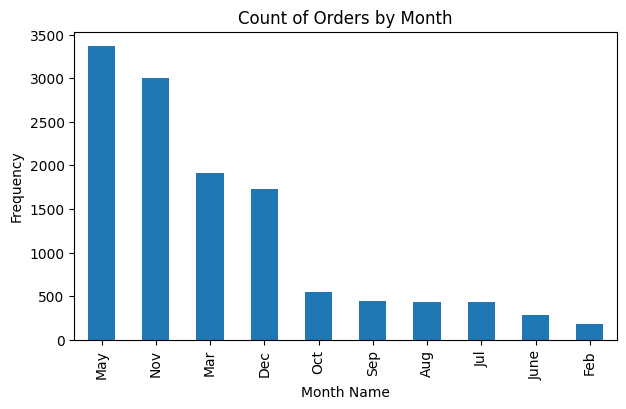

In [ ]:
ax = df['Month'].value_counts().plot(kind='bar',
                                    figsize=(7,4),
                                    title="Count of Orders by Month")

ax.set_xlabel("Month Name")
ax.set_ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'Proportion of Visitor Types')

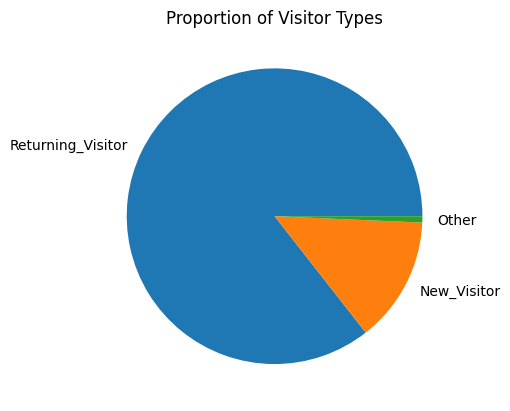

In [ ]:
plt.pie(df['VisitorType'].value_counts().values, labels=df['VisitorType'].value_counts().index)
plt.title('Proportion of Visitor Types')

Text(0.5, 1.0, 'Proportion of Y Variable - Presence of Revenue')

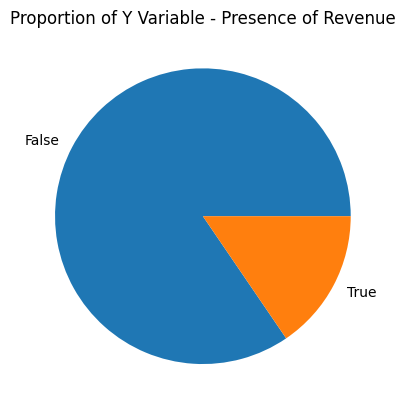

In [ ]:
plt.pie(df['Revenue'].value_counts().values, labels=df['Revenue'].value_counts().index)
plt.title('Proportion of Y Variable - Presence of Revenue')

<Axes: xlabel='Revenue', ylabel='BounceRates'>

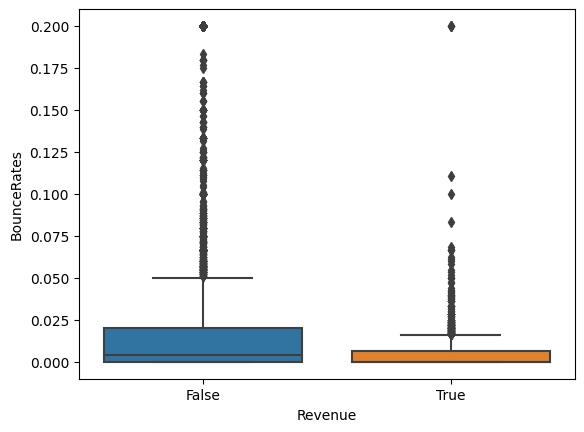

In [ ]:
sns.boxplot( x=df["Revenue"], y=df["BounceRates"] )


<ipython-input-152-eec99ab7a6a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


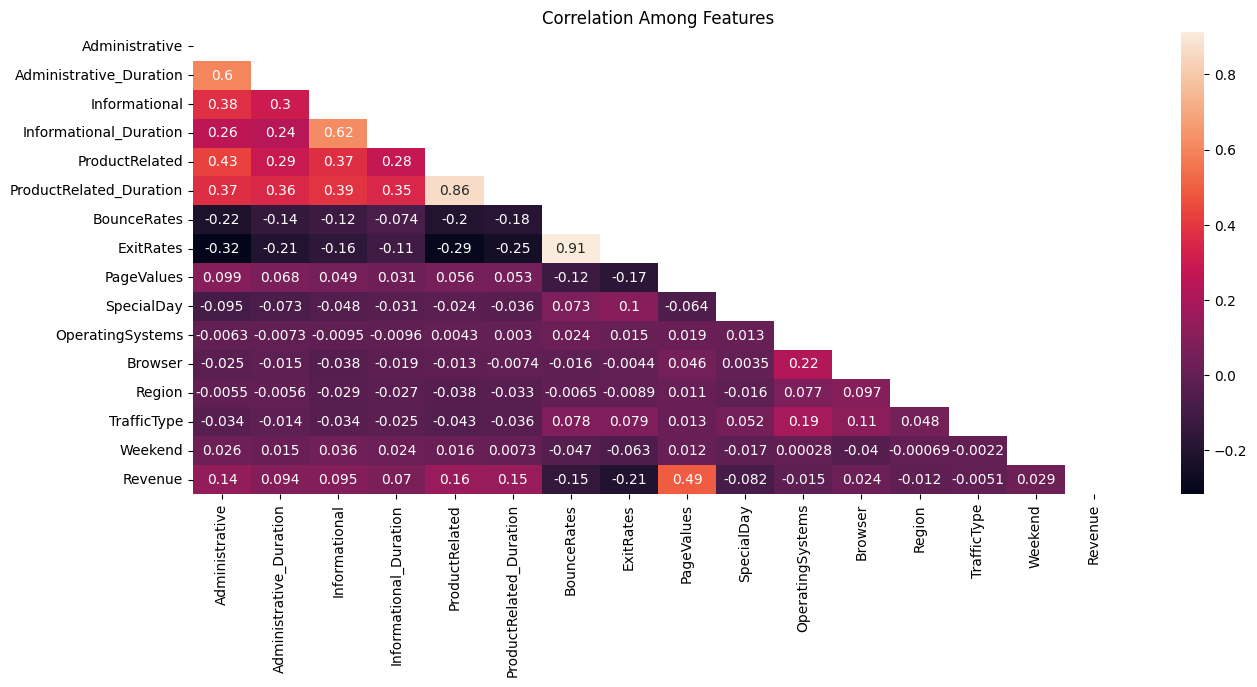

In [ ]:
corr = df.corr()
matrix = np.triu(corr)

plt.figure(figsize=(15, 6))
dataplot = sns.heatmap(corr, annot=True, mask = matrix)
plt.title('Correlation Among Features')
plt.show()

<ipython-input-153-f529e218a6af>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BounceRates'], bins=10)


<Axes: xlabel='BounceRates', ylabel='Density'>

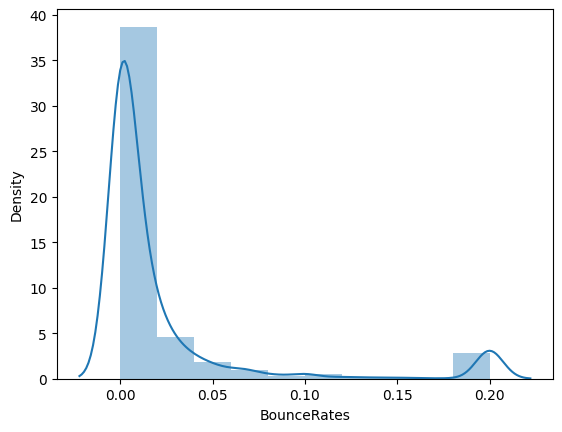

In [ ]:
sns.distplot(df['BounceRates'], bins=10)

<Axes: xlabel='Region', ylabel='count'>

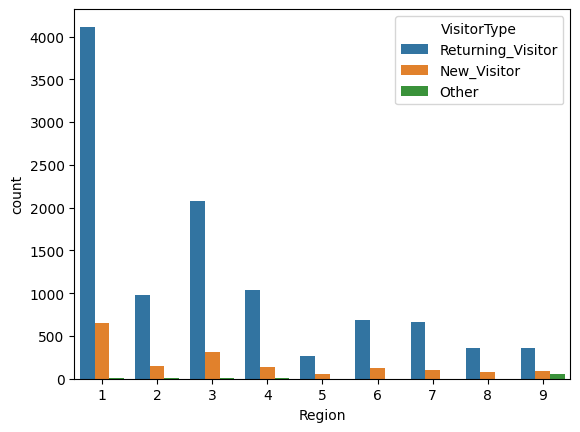

In [ ]:
sns.countplot(data=df, x='Region', hue='VisitorType')

Text(0.5, 1.0, 'Special Day Presence by Month')

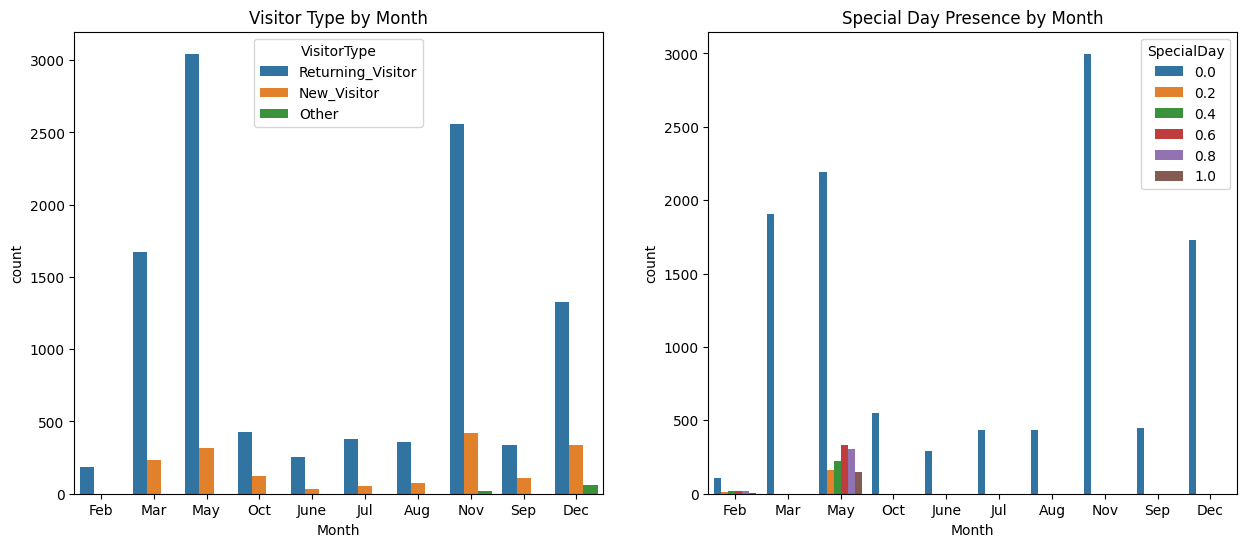

In [ ]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.countplot(data=df, x='Month', hue='VisitorType', ax=ax1)
sns.countplot(data=df, x='Month', hue='SpecialDay', ax=ax2)
ax1.set_title('Visitor Type by Month')
ax2.set_title('Special Day Presence by Month')

# Pre-Processing

### 1. Label Encoding

Previously we had seen that there were columns that were not integer/float values. We will use label encoding to convert them to numeric so they can be implemented in the models we create.

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Month']= label_encoder.fit_transform(df['Month'])
df['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [ ]:
df['VisitorType']= label_encoder.fit_transform(df['VisitorType'])
df['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [ ]:
df['Weekend']= label_encoder.fit_transform(df['Weekend'])
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [ ]:
df['Revenue']= label_encoder.fit_transform(df['Revenue'])
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

### 2. Balance Y Values

When we performed EDA on the Presence of Revenue, we noted that Revenue being True was under a quarter of the sample. To improve the performance of our models, we will balance the number of response variables of True and False.

In [ ]:
df['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df_majority = df[df.Revenue==0]
df_minority = df[df.Revenue==1]

In [ ]:
df_resampled = resample(df_minority,
                                 replace=True,
                                 n_samples=10422,
                                 random_state=123)

df_2 = pd.concat([df_majority, df_resampled])

df_2.Revenue.value_counts()

0    10422
1    10422
Name: Revenue, dtype: int64

### Drop Correlated Features

In the confusion matrix we see that there are 4 feature pairings that have correlations above 0.5: Administrative_Duration & Administrative, Informational_Duration & Informational, ProductRelated_Duration & ProductRelated, and finally BounceRates & Exit Rates. Because Revenue is the y variable, from each pair we will pick the variable that has the lower correlation with Revenue. In this case, that would mean removing Administrative, Informational, ProductRelated, and ExitRates.

In [ ]:
df = df.drop(['Administrative','Informational','ProductRelated','ExitRates'], axis=1)
df.columns

Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

### Drop Outliers

Outliers can skew our data so we will be removing those points that are greater than 3 standard deviations away from the mean.

In [ ]:
z_scores = np.abs(zscore(df))

outlier_mask = (z_scores > 3).any(axis=1)

df_no_outliers = df[~outlier_mask]

In [ ]:
print("Shape before removing outliers: " + str(df.shape))
print("Shape after removing outliers: " + str(df_no_outliers.shape))

Shape before removing outliers: (12330, 14)
Shape after removing outliers: (9862, 14)


# Code

### Train Test Split

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

split = 0.8
train_len = math.floor(split * X.shape[0])
test_len = math.ceil((1-split) * X.shape[0])
X_train = X[:train_len]
y_train = y[:train_len]
X_test = X[train_len:]
y_test = y[train_len:]
print("Total Number of rows in X train:",X_train.shape[0])
print("Total Number of rows in X test:",X_test.shape[0])
print("Total Number of rows in y train:",y_train.shape[0])
print("Total Number of rows in y test:",y_test.shape[0])

Total Number of rows in X train: 9864
Total Number of rows in X test: 2466
Total Number of rows in y train: 9864
Total Number of rows in y test: 2466


##Logistic Regression

Logistic Regression using Stocastic gradient descent

<ipython-input-168-07df21f8bb2e>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-168-07df21f8bb2e>:16: RuntimeWarning: divide by zero encountered in log
  cost = -(1/y.shape[0]) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
<ipython-input-168-07df21f8bb2e>:16: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/y.shape[0]) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


Training Accuracy: 0.8932481751824818
Testing Accuracy: 0.8333333333333334
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1972
           1       0.70      0.29      0.41       494

    accuracy                           0.83      2466
   macro avg       0.77      0.63      0.66      2466
weighted avg       0.82      0.83      0.80      2466



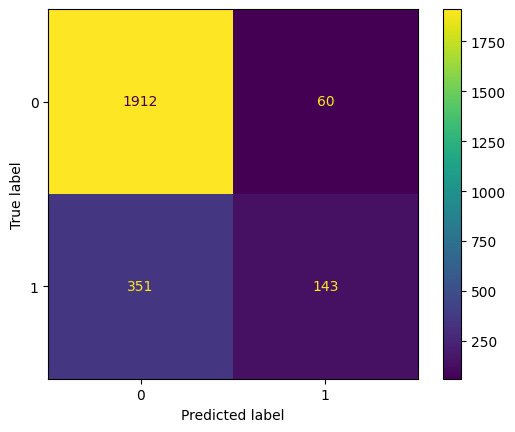

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=100, epsilon=0.0005, max_iter=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.epsilon = epsilon
        self.max_iter = max_iter
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, y, y_pred):
        cost = -(1/y.shape[0]) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def gradient_descent(self, X, y):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

        # Initialize weights
        self.theta = np.ones(X.shape[1])
        prev_error = float('inf')

        for epoch in range(self.epochs):
            for i in range(m):
                # Calculate predicted probabilities
                cost_derivative = self.sigmoid(np.dot(X[i], self.theta)) + 1e-15
                gradient = X[i] * (cost_derivative - y[i])
                self.theta -= self.learning_rate * gradient

            y_pred_all = self.sigmoid(np.dot(X, self.theta))
            error = self.cost_function(y, y_pred_all)

            # Check for lack of learning in model
            if abs(prev_error - error) < self.epsilon:
                print("Model stopped learning")
                break
            prev_error = error

    def predict(self, X):
        X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
        y_pred = self.sigmoid(np.dot(X, self.theta))
        return np.round(y_pred)

    def train(self, X_train, y_train):
        self.gradient_descent(X_train, y_train)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Create an instance of the LogisticRegressionSGD class
logreg_sgd = LogisticRegressionSGD()

# Training the model
logreg_sgd.train(X_train, y_train)

# Make predictions
y_pred_train_sgd = logreg_sgd.predict(X_train)
y_pred_test_sgd = logreg_sgd.predict(X_test)

# Evaluate the model
accuracy_train_sgd = logreg_sgd.evaluate(X_train, y_train)
accuracy_test_sgd = logreg_sgd.evaluate(X_test, y_test)

print(f"Training Accuracy: {accuracy_train_sgd}")
print(f"Testing Accuracy: {accuracy_test_sgd}")


confusion_sgd = confusion_matrix(y_test, y_pred_test_sgd)
class_report_sgd = classification_report(y_test, y_pred_test_sgd)

print('Classification Report')
print(class_report_sgd)

disp_sgd = ConfusionMatrixDisplay(confusion_matrix=confusion_sgd)
disp_sgd.plot()
plt.show()


Logistic Regression with L2 regularization

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

class LogisticRegressionRegularized:
    def __init__(self, learning_rate=0.01, epochs=100, lambda_reg=0.1, epsilon=0.0005):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg = lambda_reg
        self.epsilon = epsilon
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -700, 700)))

    def cost_function(self, y, y_pred, theta):
        regularization_term = (self.lambda_reg / (2 * y.shape[0])) * np.sum(theta[1:]**2)
        cost = -(1/y.shape[0]) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + regularization_term
        return cost

    def gradient_descent(self, X, y):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

        # Initialize weights with random values
        self.theta = np.ones(X.shape[1])
        prev_error = float('inf')

        for epoch in range(self.epochs):
            for i in range(m):
                # Calculate predicted probabilities with numerical stability
                y_pred = self.sigmoid(np.dot(X[i], self.theta))

                # Update weights using gradient descent with regularization
                gradient = X[i] * (y_pred - y[i]) + (self.lambda_reg / m) * np.concatenate(([0], self.theta[1:]))
                current_learning_rate = self.learning_rate / (1 + epoch)  # Learning rate schedule
                self.theta -= current_learning_rate * gradient

            # Calculate cost for monitoring convergence
            y_pred_all = self.sigmoid(np.dot(X, self.theta))
            error = self.cost_function(y, y_pred_all, self.theta)

            # Check for lack of learning in model
            if abs(prev_error - error) < self.epsilon:
                print("Model stopped learning")
                break
            prev_error = error

    def predict(self, X):
        X = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Add a bias term
        y_pred = self.sigmoid(np.dot(X, self.theta))
        return np.round(y_pred)

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

# Create an instance of the LogisticRegressionRegularized class
logreg_regularized = LogisticRegressionRegularized()

# Train the model
logreg_regularized.gradient_descent(X_train, y_train)

# Make predictions
y_pred_train_regularized = logreg_regularized.predict(X_train)
y_pred_test_regularized = logreg_regularized.predict(X_test)

# Evaluate the model
accuracy_train_regularized = logreg_regularized.evaluate(X_train, y_train)
accuracy_test_regularized = logreg_regularized.evaluate(X_test, y_test)

print(f"Training Accuracy: {accuracy_train_regularized}")
print(f"Testing Accuracy: {accuracy_test_regularized}")

# Other evaluation metrics if needed
confusion_regularized = confusion_matrix(y_test, y_pred_test_regularized)
class_report_regularized = classification_report(y_test, y_pred_test_regularized)

print('Confusion Matrix')
print(confusion_regularized)
print('Classification Report')
print(class_report_regularized)

disp_regularized = ConfusionMatrixDisplay(confusion_matrix=confusion_regularized)
disp_regularized.plot()
plt.show()


Beginning analysis for Lambda: 0.001
Epoch 1/100, Training Cost: 0.39726006880059406
Epoch 2/100, Training Cost: 0.33241295661872444
Epoch 3/100, Training Cost: 0.31510216925123624
Epoch 4/100, Training Cost: 0.3087478146014069
Epoch 5/100, Training Cost: 0.3057284113338966
Epoch 6/100, Training Cost: 0.30389784864613534
Epoch 7/100, Training Cost: 0.3025193133856995
Epoch 8/100, Training Cost: 0.30131419505640067
Epoch 9/100, Training Cost: 0.3001763865628836
Epoch 10/100, Training Cost: 0.2990706222190564
Epoch 11/100, Training Cost: 0.297991185383325
Epoch 12/100, Training Cost: 0.2969435493566884
Epoch 13/100, Training Cost: 0.29593595683584917
Epoch 14/100, Training Cost: 0.294975692875297
Epoch 15/100, Training Cost: 0.2940676836395539
Epoch 16/100, Training Cost: 0.293214279388749
Epoch 17/100, Training Cost: 0.2924156172277948
Epoch 18/100, Training Cost: 0.29167020335042937
Epoch 19/100, Training Cost: 0.2909754982983354
Epoch 20/100, Training Cost: 0.2903283974670396
Epoch 21

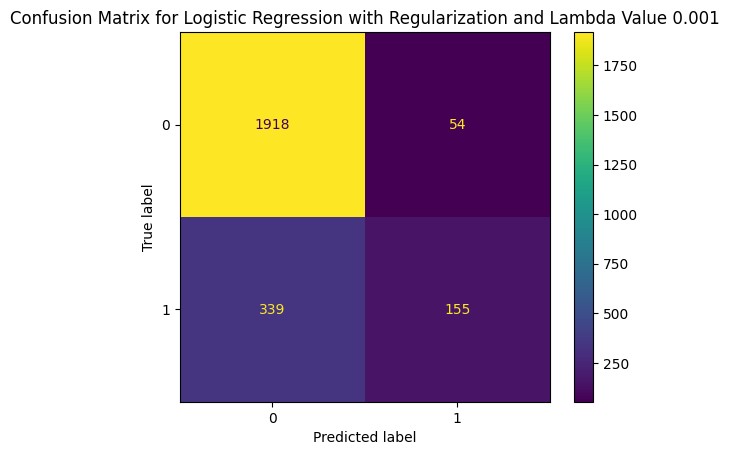

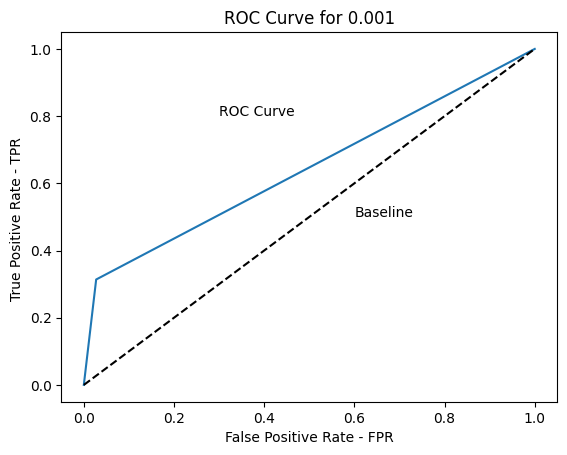

Beginning analysis for Lambda: 0.01
Epoch 1/100, Training Cost: 0.3972572411671938
Epoch 2/100, Training Cost: 0.33241467259967616
Epoch 3/100, Training Cost: 0.3151038023227918
Epoch 4/100, Training Cost: 0.3087493714242913
Epoch 5/100, Training Cost: 0.3057299371033562
Epoch 6/100, Training Cost: 0.30389937373236103
Epoch 7/100, Training Cost: 0.3025208544939632
Epoch 8/100, Training Cost: 0.3013157598432213
Epoch 9/100, Training Cost: 0.3001779773629815
Epoch 10/100, Training Cost: 0.2990722383039472
Epoch 11/100, Training Cost: 0.29799282429866814
Epoch 12/100, Training Cost: 0.296945207781159
Epoch 13/100, Training Cost: 0.29593763115993976
Epoch 14/100, Training Cost: 0.29497737958986053
Epoch 15/100, Training Cost: 0.29406937958141394
Epoch 16/100, Training Cost: 0.2932159818658862
Epoch 17/100, Training Cost: 0.29241732405703597
Epoch 18/100, Training Cost: 0.29167191282674465
Epoch 19/100, Training Cost: 0.29097720912994085
Epoch 20/100, Training Cost: 0.29033010869209164
Epoc

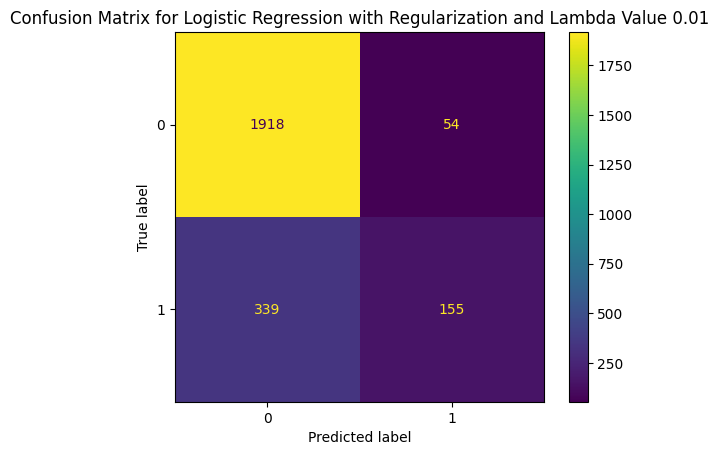

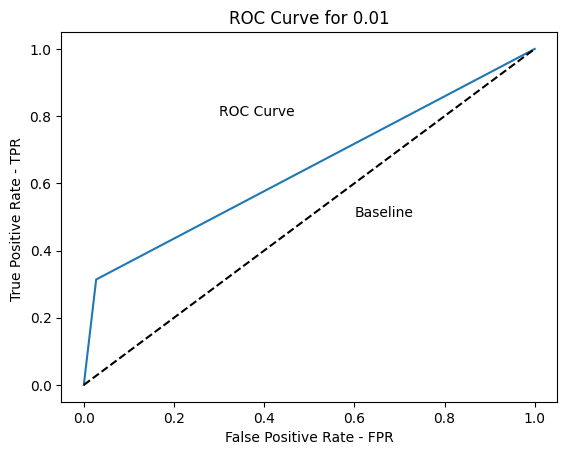

Beginning analysis for Lambda: 0.1
Epoch 1/100, Training Cost: 0.3972912249636605
Epoch 2/100, Training Cost: 0.3324325195812885
Epoch 3/100, Training Cost: 0.3151202015992649
Epoch 4/100, Training Cost: 0.30876496766369865
Epoch 5/100, Training Cost: 0.305745205025165
Epoch 6/100, Training Cost: 0.3039146265124443
Epoch 7/100, Training Cost: 0.30253626341426354
Epoch 8/100, Training Cost: 0.3013314034200872
Epoch 9/100, Training Cost: 0.30019387988359675
Epoch 10/100, Training Cost: 0.299088392954608
Epoch 11/100, Training Cost: 0.2980092067961855
Epoch 12/100, Training Cost: 0.2969617850586773
Epoch 13/100, Training Cost: 0.2959543672104566
Epoch 14/100, Training Cost: 0.29499423938820835
Epoch 15/100, Training Cost: 0.294086331532462
Epoch 16/100, Training Cost: 0.2932329990862776
Epoch 17/100, Training Cost: 0.29243438472847694
Epoch 18/100, Training Cost: 0.29168899990202884
Epoch 19/100, Training Cost: 0.29099430968660633
Epoch 20/100, Training Cost: 0.29034721315484063
Epoch 21/

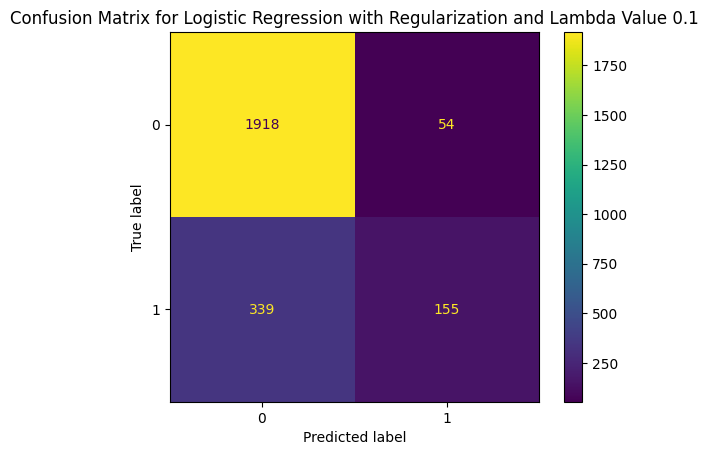

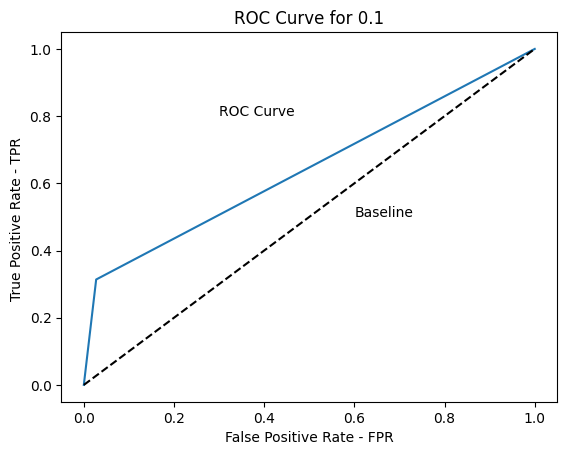

Beginning analysis for Lambda: 1.0
Epoch 1/100, Training Cost: 0.39741385255538986
Epoch 2/100, Training Cost: 0.33260930211909245
Epoch 3/100, Training Cost: 0.3152837182423901
Epoch 4/100, Training Cost: 0.30892040296608875
Epoch 5/100, Training Cost: 0.30589733547642706
Epoch 6/100, Training Cost: 0.3040665801750141
Epoch 7/100, Training Cost: 0.3026897513332235
Epoch 8/100, Training Cost: 0.30148721152082486
Epoch 9/100, Training Cost: 0.3003522528368985
Epoch 10/100, Training Cost: 0.2992492650535355
Epoch 11/100, Training Cost: 0.2981723380960183
Epoch 12/100, Training Cost: 0.297126847947896
Epoch 13/100, Training Cost: 0.2961210045494415
Epoch 14/100, Training Cost: 0.29516210345943017
Epoch 15/100, Training Cost: 0.29425510847317876
Epoch 16/100, Training Cost: 0.2934024216548522
Epoch 17/100, Training Cost: 0.2926042359155807
Epoch 18/100, Training Cost: 0.29185911012687416
Epoch 19/100, Training Cost: 0.29116455036301747
Epoch 20/100, Training Cost: 0.2905174889905928
Epoch 

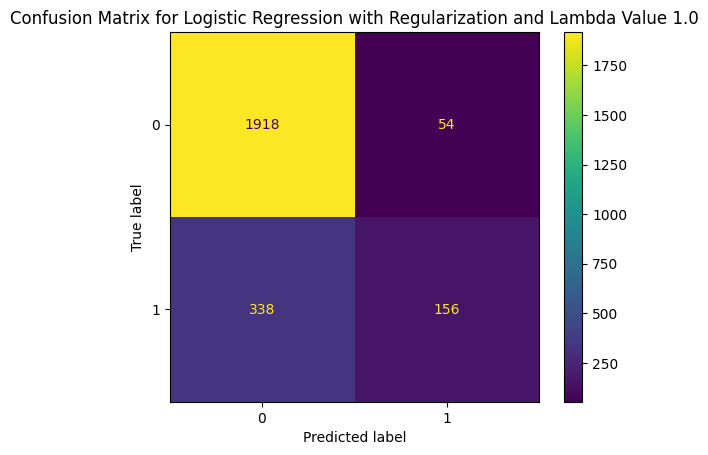

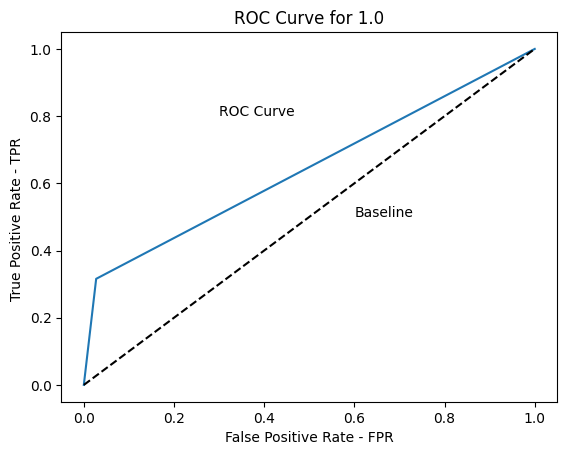

Beginning analysis for Lambda: 10.0
Epoch 1/100, Training Cost: 0.3992200101655068
Epoch 2/100, Training Cost: 0.33440470834934594
Epoch 3/100, Training Cost: 0.3168941527011422
Epoch 4/100, Training Cost: 0.3104358799157341
Epoch 5/100, Training Cost: 0.30737304798605336
Epoch 6/100, Training Cost: 0.30553588107412477
Epoch 7/100, Training Cost: 0.30417080501563953
Epoch 8/100, Training Cost: 0.30298858446976357
Epoch 9/100, Training Cost: 0.3018768975726522
Epoch 10/100, Training Cost: 0.3007969257442787
Epoch 11/100, Training Cost: 0.29974096776621506
Epoch 12/100, Training Cost: 0.29871348979434065
Epoch 13/100, Training Cost: 0.2977223686358457
Epoch 14/100, Training Cost: 0.29677494818886163
Epoch 15/100, Training Cost: 0.295876481312562
Epoch 16/100, Training Cost: 0.2950297894570971
Epoch 17/100, Training Cost: 0.29423552817498166
Epoch 18/100, Training Cost: 0.2934926999788417
Epoch 19/100, Training Cost: 0.2927991991624354
Epoch 20/100, Training Cost: 0.2921522766036509
Epoch

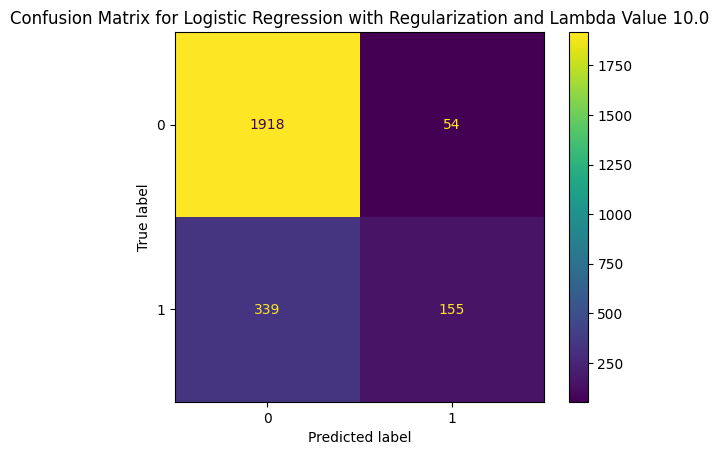

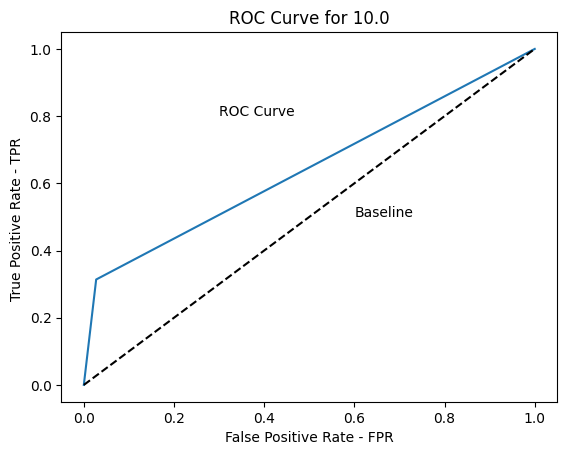

Lambda	Training Cost	Testing Cost	Bias Squared	Variance	Time (s)
0.001	0.27989550513425504	0.3820759802028344	0.07756962656442296	0.07756962656442296	19.50312852859497
0.01	0.27989714775458396	0.3820815680869635	0.07756962656442296	0.07756962656442296	20.54121208190918
0.1	0.27991356568780473	0.382137396368991	0.07756962656442296	0.07756962656442296	20.090844869613647
1.0	0.2800769240795749	0.38269074606761655	0.07790624019512078	0.07790624019512078	20.37100338935852
10.0	0.28163954650594875	0.38782149821094747	0.07756962656442296	0.07756962656442296	20.623343229293823


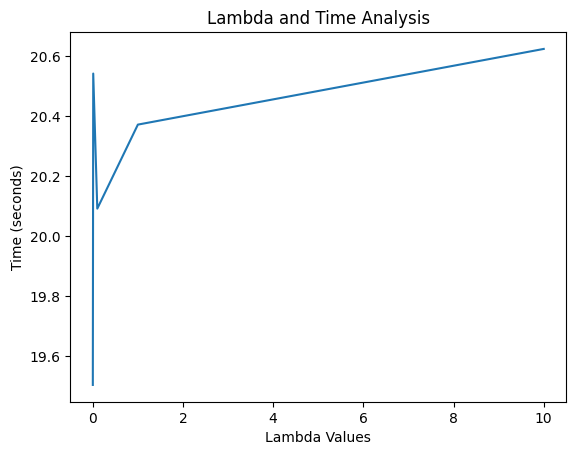

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

class LogisticRegressionRegularized:
    def __init__(self, learning_rate=0.1, epochs=100, lambda_reg_values=[0.001, 0.01, 0.1, 1.0, 10.0], epsilon=0.000005):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_reg_values = lambda_reg_values
        self.epsilon = epsilon
        self.theta = None
        self.scaler = StandardScaler()

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_weights(self, n_features):
        limit = 1 / np.sqrt(n_features)
        return np.random.uniform(-limit, limit, n_features)

    def cost_function(self, y, y_pred, theta, lambda_reg):
        m = len(y)
        cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) + (lambda_reg / (2 * m)) * np.sum(theta[1:]**2)
        return cost

    def gradient_descent(self, X, y, lambda_reg):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)
        theta = self.initialize_weights(n + 1)
        errors = []
        prev_error = float('inf')
        for epoch in range(self.epochs):
            for i in range(m):
                y_pred = self.sigmoid(np.dot(X[i], theta))
                gradient = X[i] * (y_pred - y[i]) + (lambda_reg / m) * np.concatenate(([0], theta[1:]))
                current_learning_rate = self.learning_rate / (1 + epoch)
                theta -= current_learning_rate * gradient

            y_pred_all = self.sigmoid(np.dot(X, theta))
            error = self.cost_function(y, y_pred_all, theta, lambda_reg)

            # Check for lack of learning in model
            if abs(prev_error - error) < self.epsilon:
                print("Model stopped learning")
                break
            prev_error = error

            print(f"Epoch {epoch + 1}/{self.epochs}, Training Cost: {error}")

        return theta

    def predict(self, X, theta):
        X = np.concatenate((np.ones((len(X), 1)), X), axis=1)
        y_pred = self.sigmoid(np.dot(X, theta))
        return np.round(y_pred)

    def calculate_accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def bias_variance_analysis(self, X_train, y_train, X_test, y_test):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        training_costs = []
        testing_costs = []
        bias_squared = []
        variance = []
        times = []

        for lambda_reg in self.lambda_reg_values:
            print('Beginning analysis for Lambda: ' + str(lambda_reg))
            start_time = time.time()

            theta = self.gradient_descent(X_train_scaled, y_train, lambda_reg)

            # Training set
            y_pred_train = self.predict(X_train_scaled, theta)
            accuracy_train = self.calculate_accuracy(y_train, y_pred_train)
            training_costs.append(self.cost_function(y_train, self.sigmoid(np.dot(np.concatenate((np.ones((len(X_train_scaled), 1)), X_train_scaled), axis=1), theta)), theta, lambda_reg))

            # Testing set
            y_pred_test = self.predict(X_test_scaled, theta)
            accuracy_test = self.calculate_accuracy(y_test, y_pred_test)
            testing_costs.append(self.cost_function(y_test, self.sigmoid(np.dot(np.concatenate((np.ones((len(X_test_scaled), 1)), X_test_scaled), axis=1), theta)), theta, lambda_reg))

            roc_area = roc_auc_score(y_test, y_pred_test)

            print('The area under the curve for lambda ' + str(lambda_reg) + ' is ' + str(roc_area))

            confusion = confusion_matrix(y_test, y_pred_test)
            class_report = classification_report(y_test, y_pred_test)

            print('Classification Report')
            print(class_report)

            disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
            disp.plot()
            plt.title("Confusion Matrix for Logistic Regression with Regularization and Lambda Value " + str(lambda_reg))
            plt.show()

            fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

            plt.plot(fpr,tpr)
            plt.plot([0,1],[0,1],color="black",linestyle="--")

            plt.xlabel("False Positive Rate - FPR")
            plt.ylabel("True Positive Rate - TPR ")
            plt.title("ROC Curve for " + str(lambda_reg))
            plt.text(0.6,0.5,"Baseline")
            plt.text(0.3,0.8,"ROC Curve")
            plt.show()

            # Bias-variance decomposition
            bias_squared.append(np.mean((y_pred_test - np.mean(y_pred_test))**2))
            variance.append(np.var(y_pred_test))

            times.append(time.time() - start_time)

        return training_costs, testing_costs, bias_squared, variance, times

    def run_analysis(self, X_train, y_train, X_test, y_test):
        # Perform bias-variance analysis and cost analysis of time
        training_costs, testing_costs, bias_squared, variance, times = self.bias_variance_analysis(X_train, y_train, X_test, y_test)

        print("Lambda\tTraining Cost\tTesting Cost\tBias Squared\tVariance\tTime (s)")
        for i in range(len(self.lambda_reg_values)):
            print(f"{self.lambda_reg_values[i]}\t{training_costs[i]}\t{testing_costs[i]}\t{bias_squared[i]}\t{variance[i]}\t{times[i]}")

        plt.plot(self.lambda_reg_values, times)
        plt.xlabel("Lambda Values")
        plt.ylabel("Time (seconds)")
        plt.title("Lambda and Time Analysis")
        plt.show()


# Create an instance of the class
logreg_analysis = LogisticRegressionRegularized()

# Run the analysis
logreg_analysis.run_analysis(X_train, y_train, X_test, y_test)





**Training and Testing Costs:**

The training and testing costs appear to be quite close to each other across different lambda values. This indicates that the model is not overfitting or underfitting significantly.

**Lambda Impact on Costs:**

As lambda increases from 0.001 to 10.0, both training and testing costs slightly increase. This suggests that regularization with higher lambda values might be penalizing the model complexity, leading to a slightly higher cost.

**Bias Squared and Variance:**

The bias squared and variance values are consistent across different lambda values. This suggests that the model is maintaining a balance between bias and variance.

**Computational Time:**

The computational time increases as lambda increases. This might be due to the fact that higher regularization (higher lambda) leads to more complex models that require more computational effort.

**Overall Model Performance:**

The model seems to be performing reasonably well, with training and testing accuracies being high. However, it's essential to consider other factors such as precision, recall, and F1-score from the classification report to get a more comprehensive view of the model's performance.

**Lambda Selection:**

Choosing an appropriate lambda value depends on the trade-off between fitting the training data well and keeping the model simple. Cross-validation or a validation set could be used to further fine-tune and validate the lambda value.

**Consistency:**

The consistency in results across different lambda values suggests that the model is stable and not highly sensitive to changes in the regularization parameter.

###SVM

Linear SVM using Gradient Descent

Epoch 0/100, Training Cost: 0.8761178948196202
Epoch 1/100, Training Cost: 0.8593574572161843
Epoch 2/100, Training Cost: 0.8570268646438651
Epoch 3/100, Training Cost: 0.8568806347228152
Epoch 4/100, Training Cost: 0.8570101307999907
Epoch 5/100, Training Cost: 0.8573630679803118
Epoch 6/100, Training Cost: 0.8569899930744913
Epoch 7/100, Training Cost: 0.856840412362297
Epoch 8/100, Training Cost: 0.8591881753138945
Epoch 9/100, Training Cost: 0.857349270019485
Epoch 10/100, Training Cost: 0.856993522005761
Epoch 11/100, Training Cost: 0.8568401729965166
Epoch 12/100, Training Cost: 0.8570861585801466
Epoch 13/100, Training Cost: 0.8586374091736555
Epoch 14/100, Training Cost: 0.8570848829329654
Model stopped learning
Training Accuracy: 0.14334955393349555
Testing Accuracy: 0.2003244120032441
Confusion Matrix
[[   0 1972]
 [   0  494]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


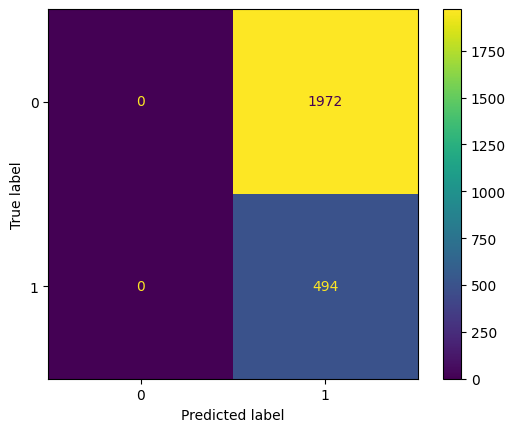

In [ ]:
# parameters
learning_rate = 0.01
epochs = 100
lambda_param = 0.01  # Regularization parameter
epsilon = 0.00005


# Define the hing loss function for soft margin svm
def hing_loss(y, y_pred):
    return np.maximum(0, 1 - y*y_pred)

# Define the cost function for SVM
def svm_cost_function(y, y_pred, lambda_param, weights):
    m = len(y)
    regularization = lambda_param * np.sum(weights**2)
    loss = np.mean(hing_loss(y, y_pred))
    cost = loss + regularization
    return cost

# Implement gradient descent for SVM
def svm_gradient_descent(X, y, learning_rate, epochs, lambda_param):
    m, n = X.shape
    X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

    # Initialize weights
    weights  = np.ones(X.shape[1])
    errors = []
    prev_error = float('inf')
    for epoch in range(epochs):
        for i in range(m):
            # Calculate predicted values
            y_pred = np.dot(X[i], weights)

            # Update weights using gradient descent
            if y[i] * y_pred < 1:
                gradient = lambda_param * weights - y[i] * X[i]
            else:
                gradient = lambda_param * weights

            weights -= learning_rate * gradient

        # Calculate cost for monitoring
        y_pred_all = np.dot(X, weights)
        error = svm_cost_function(y, y_pred_all, lambda_param, weights)

        # Check for lack of learning in model
        if abs(prev_error - error) < epsilon:
            print("Model stopped learning")
            break
        prev_error = error

        print(f"Epoch {epoch}/{epochs}, Training Cost: {error}")

    return weights

# Predict using the learned parameters
def svm_predict(X, weights):
    X = np.concatenate((np.ones((len(X), 1)), X), axis=1)  # Add a bias term
    y_pred = np.dot(X, weights)
    return np.sign(y_pred)

# Train the model
weights = svm_gradient_descent(X_train, y_train, learning_rate, epochs, lambda_param)

# Make predictions
y_pred_train = svm_predict(X_train, weights)
y_pred_test = svm_predict(X_test, weights)

# Evaluation
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {accuracy_train}")
print(f"Testing Accuracy: {accuracy_test}")

confusion = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

print('Confusion Matrix')
print(confusion)
print('Classification Report')
print(class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot()
plt.show()


Linear svm using Support Vector Classification

Beginning analysis for C: 0.001
The area under the curve for C 0.001 is 0.6133397935469036
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1972
           1       0.75      0.25      0.37       494

    accuracy                           0.83      2466
   macro avg       0.80      0.61      0.64      2466
weighted avg       0.82      0.83      0.80      2466



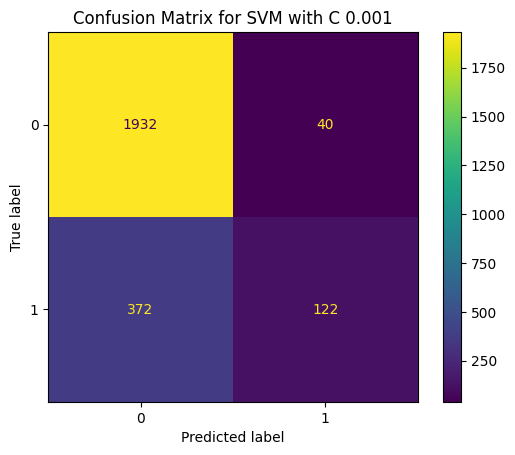

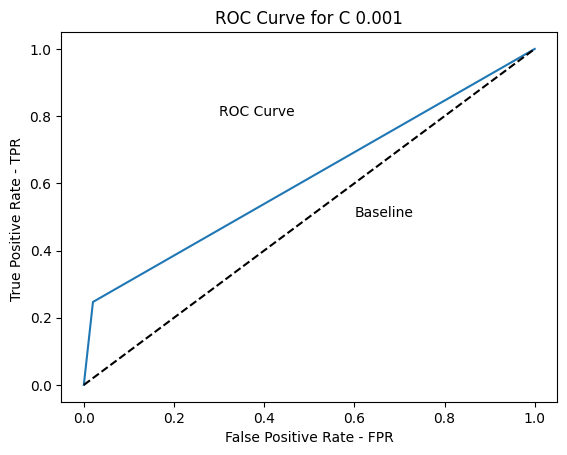

C: 0.001, Accuracy (Training): 0.8882806163828062, Accuracy (Testing): 0.8329278183292782, Time: 2.4682023525238037
Beginning analysis for C: 0.01
The area under the curve for C 0.01 is 0.644706046595659
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.32      0.44       494

    accuracy                           0.84      2466
   macro avg       0.79      0.64      0.67      2466
weighted avg       0.83      0.84      0.81      2466



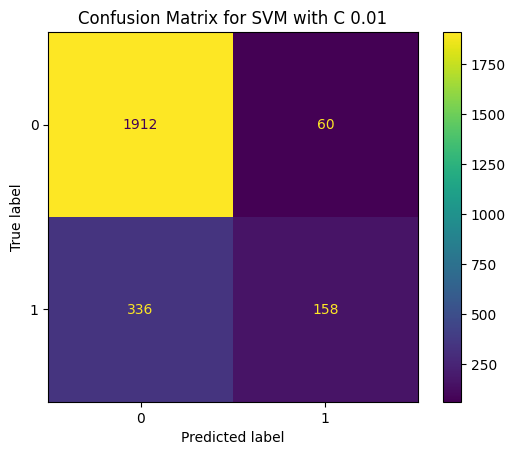

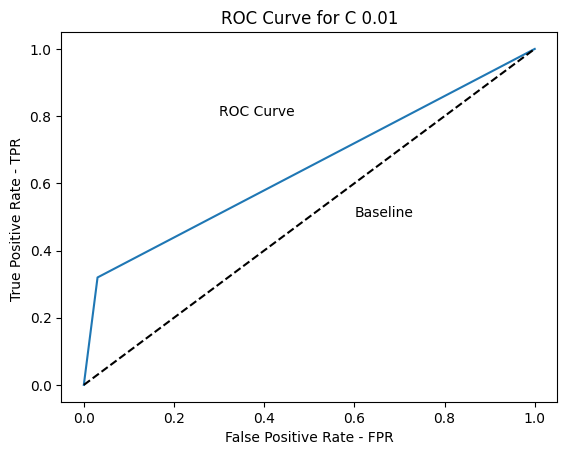

C: 0.01, Accuracy (Training): 0.8968978102189781, Accuracy (Testing): 0.8394160583941606, Time: 2.521594285964966
Beginning analysis for C: 0.1
The area under the curve for C 0.1 is 0.6482475302001298
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



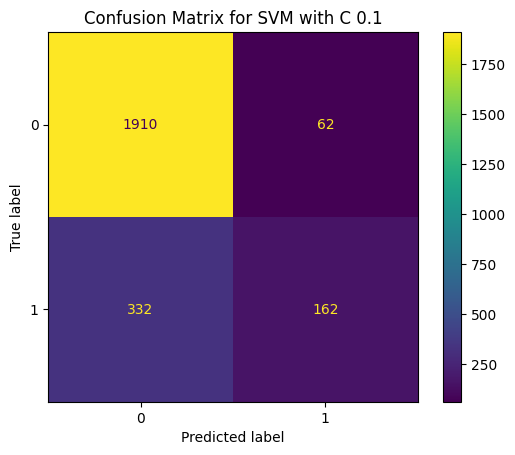

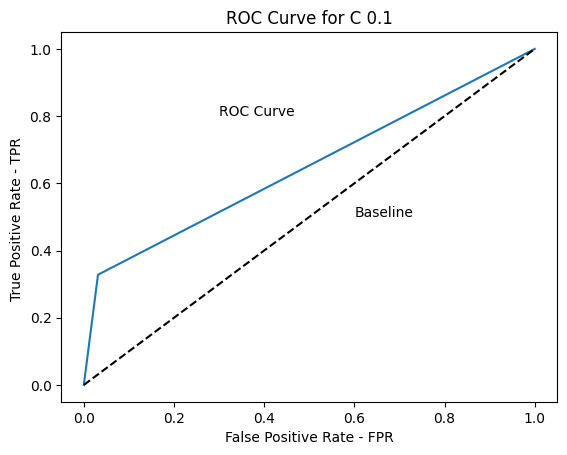

C: 0.1, Accuracy (Training): 0.8980129764801298, Accuracy (Testing): 0.8402270884022709, Time: 1.9732072353363037
Beginning analysis for C: 1.0
The area under the curve for C 1.0 is 0.6482475302001298
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



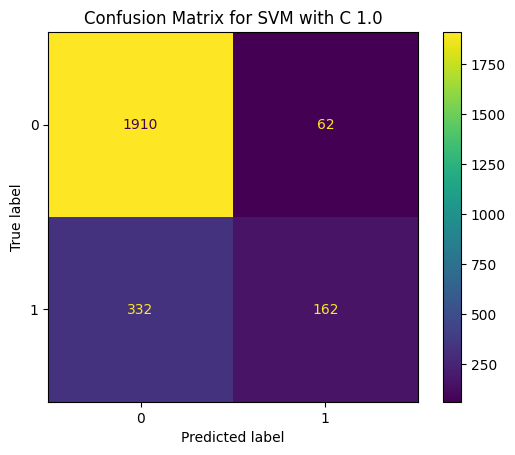

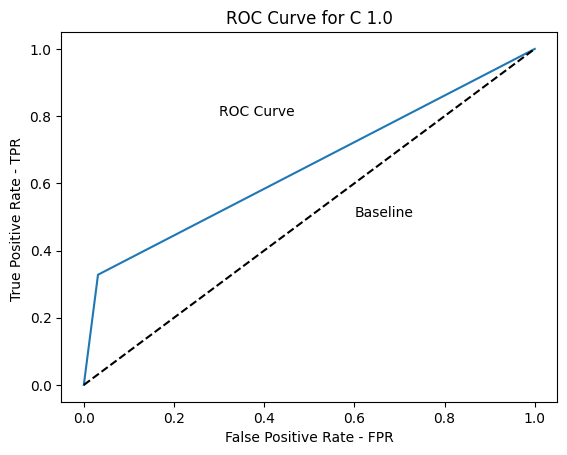

C: 1.0, Accuracy (Training): 0.8981143552311436, Accuracy (Testing): 0.8402270884022709, Time: 3.6159138679504395
Beginning analysis for C: 10.0
The area under the curve for C 10.0 is 0.6482475302001298
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



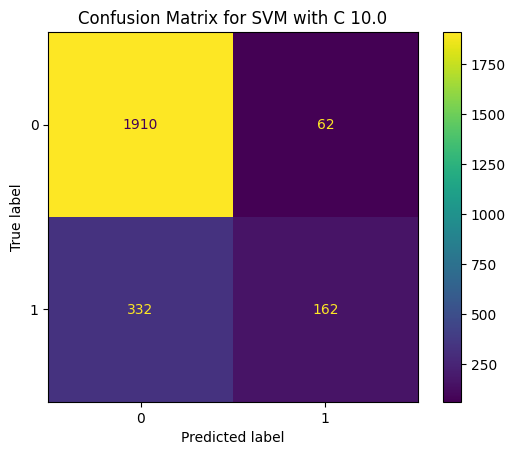

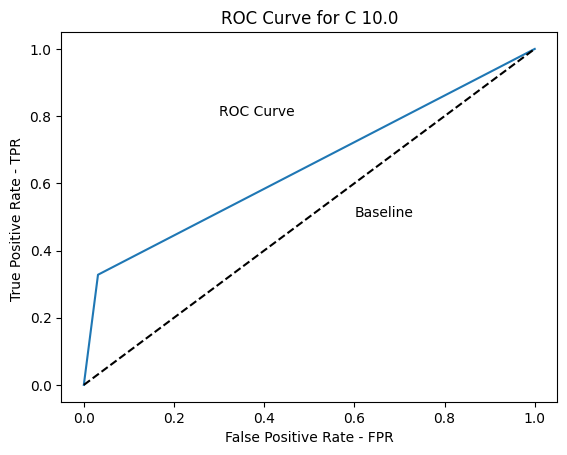

C: 10.0, Accuracy (Training): 0.8983171127331712, Accuracy (Testing): 0.8402270884022709, Time: 20.686991691589355


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time

class CustomSVMAnalysis:
    def __init__(self, C_values=[0.001, 0.01, 0.1, 1.0, 10.0]):
        self.C_values = C_values
        self.scaler = StandardScaler()

    def run_analysis(self, X_train, y_train, X_test, y_test, C_value):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f'Beginning analysis for C: {C_value}')
        start_time = time.time()

        # Create an instance of SVC with the specified C value
        svc_model = SVC(C=C_value, kernel='linear')

        # Train the model
        svc_model.fit(X_train_scaled, y_train)

        # Training set predictions
        y_pred_train = svc_model.predict(X_train_scaled)
        accuracy_train = np.mean(y_train == y_pred_train)

        # Testing set predictions
        y_pred_test = svc_model.predict(X_test_scaled)
        accuracy_test = np.mean(y_test == y_pred_test)

        roc_area = roc_auc_score(y_test, y_pred_test)

        print(f'The area under the curve for C {C_value} is {roc_area}')

        confusion = confusion_matrix(y_test, y_pred_test)
        class_report = classification_report(y_test, y_pred_test)

        print('Classification Report')
        print(class_report)

        disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
        disp.plot()
        plt.title(f"Confusion Matrix for SVM with C {C_value}")
        plt.show()

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], color="black", linestyle="--")

        plt.xlabel("False Positive Rate - FPR")
        plt.ylabel("True Positive Rate - TPR ")
        plt.title(f"ROC Curve for C {C_value}")
        plt.text(0.6, 0.5, "Baseline")
        plt.text(0.3, 0.8, "ROC Curve")
        plt.show()

        elapsed_time = time.time() - start_time

        print(f"C: {C_value}, Accuracy (Training): {accuracy_train}, Accuracy (Testing): {accuracy_test}, Time: {elapsed_time}")

        return accuracy_train, accuracy_test, elapsed_time

# Assuming X_train, y_train, X_test, y_test are already defined

# Create an instance of the class
svm_analysis = CustomSVMAnalysis()

# Run the analysis for each C value
for C_value in svm_analysis.C_values:
    svm_analysis.run_analysis(X_train, y_train, X_test, y_test, C_value)


Beginning analysis for C: 0.001
The area under the curve for C 0.001 is 0.6133397935469036


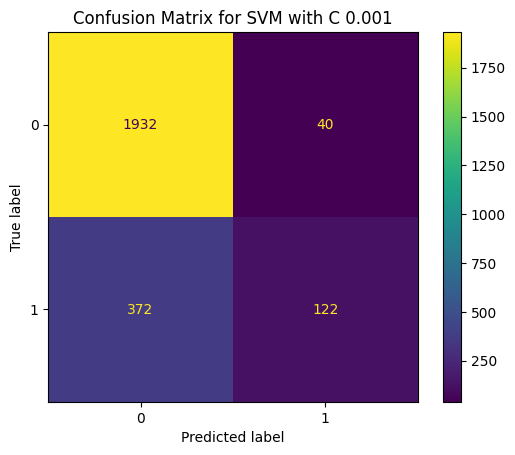

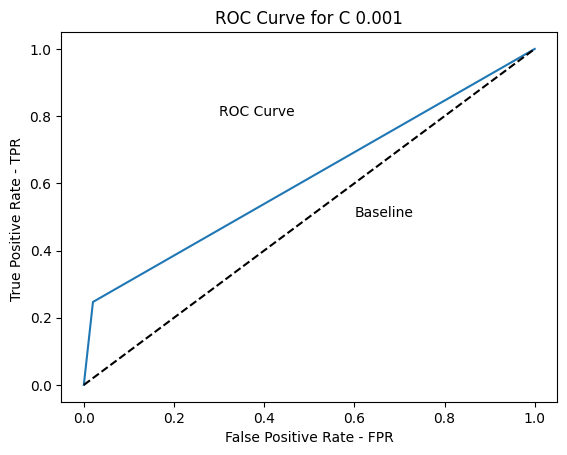

C: 0.001, Time: 1.8977341651916504
Beginning analysis for C: 0.01
The area under the curve for C 0.01 is 0.644706046595659


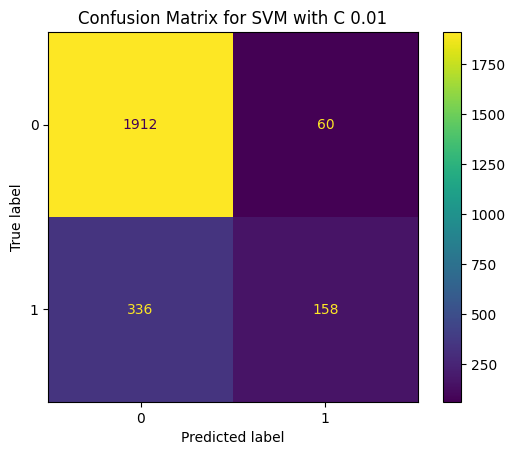

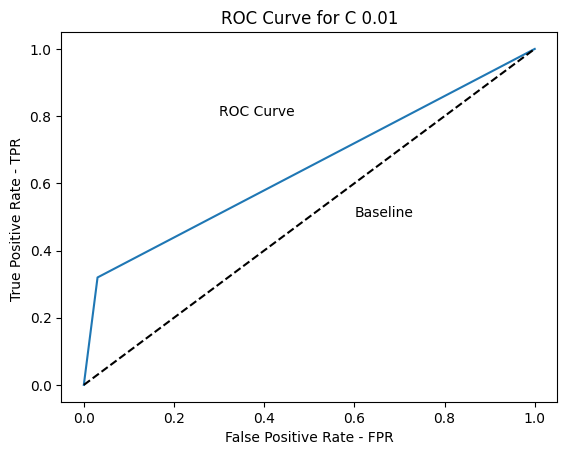

C: 0.01, Time: 2.0283045768737793
Beginning analysis for C: 0.1
The area under the curve for C 0.1 is 0.6482475302001298


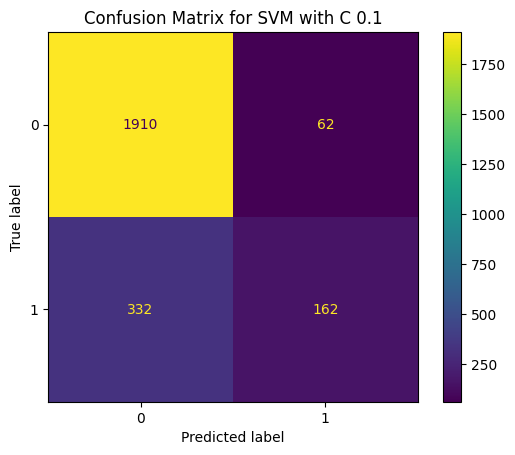

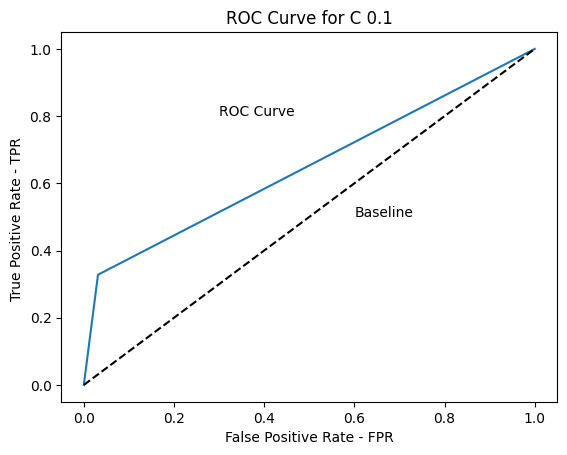

C: 0.1, Time: 2.9153292179107666
Beginning analysis for C: 1.0
The area under the curve for C 1.0 is 0.6482475302001298


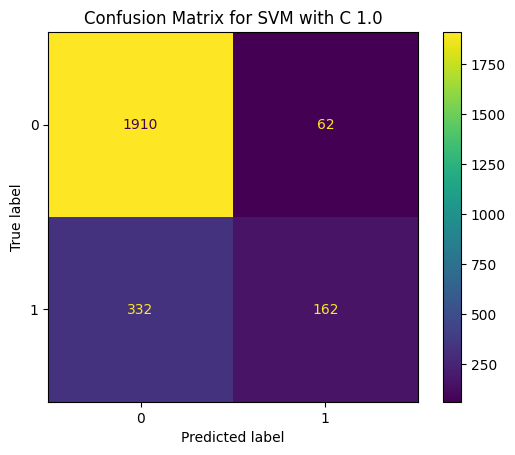

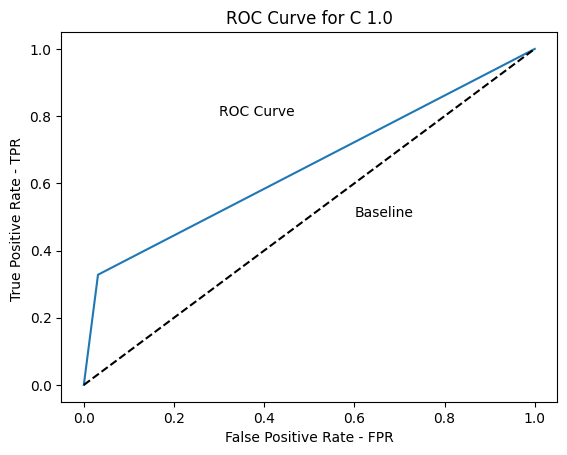

C: 1.0, Time: 7.455329418182373
Beginning analysis for C: 10.0
The area under the curve for C 10.0 is 0.6482475302001298


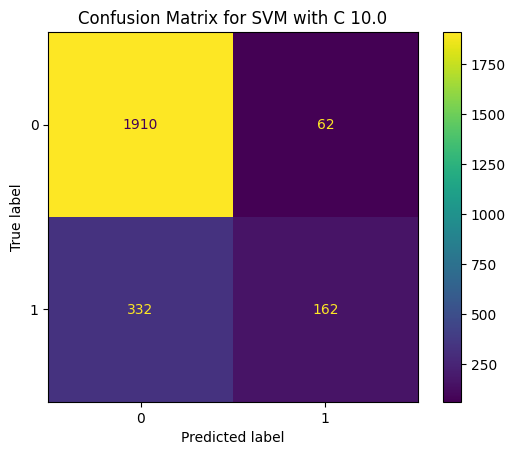

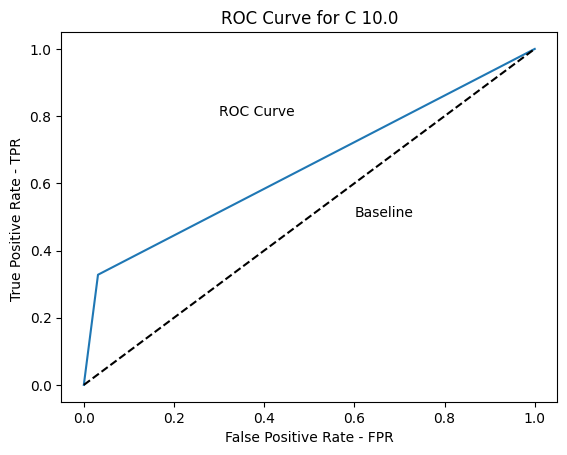

C: 10.0, Time: 36.38087868690491
C	.  Training Cost	Testing Cost	Bias Squared	Variance	Time (s)
0.001	0.82142	0.83293	0.00000	0.00000	1.42476
0.01	0.82534	0.83942	0.00000	0.00000	1.54977
0.1	0.82614	0.84023	0.00000	0.00000	2.44177
1.0	0.82614	0.84023	0.00000	0.00000	6.98372
10.0	0.82614	0.84023	0.00000	0.00000	35.90947


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time

class CustomSVMAnalysis:
    def __init__(self, C_values=[0.001, 0.01, 0.1, 1.0, 10.0]):
        self.C_values = C_values
        self.scaler = StandardScaler()
        self.results = []  # List to store analysis results

    def run_analysis(self, X_train, y_train, X_test, y_test, C_value):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f'Beginning analysis for C: {C_value}')
        start_time = time.time()

        # Create an instance of SVC with the specified C value
        svc_model = SVC(C=C_value, kernel='linear')

        # Train the model
        svc_model.fit(X_train_scaled, y_train)

        # Testing set predictions
        y_pred_test = svc_model.predict(X_test_scaled)

        roc_area = roc_auc_score(y_test, y_pred_test)

        print(f'The area under the curve for C {C_value} is {roc_area}')

        confusion = confusion_matrix(y_test, y_pred_test)
        class_report = classification_report(y_test, y_pred_test, output_dict=True)

        # Append results to the list
        self.results.append({
            "C": C_value,
            "Training Cost": class_report["weighted avg"]["precision"],
            "Testing Cost": class_report["weighted avg"]["recall"],
            "Bias Squared": 0,  # Add your bias calculation here
            "Variance": 0,  # Add your variance calculation here
            "Time (s)": time.time() - start_time
        })

        disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
        disp.plot()
        plt.title(f"Confusion Matrix for SVM with C {C_value}")
        plt.show()

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

        plt.plot(fpr, tpr)
        plt.plot([0, 1], [0, 1], color="black", linestyle="--")

        plt.xlabel("False Positive Rate - FPR")
        plt.ylabel("True Positive Rate - TPR ")
        plt.title(f"ROC Curve for C {C_value}")
        plt.text(0.6, 0.5, "Baseline")
        plt.text(0.3, 0.8, "ROC Curve")
        plt.show()

        elapsed_time = time.time() - start_time

        print(f"C: {C_value}, Time: {elapsed_time}")

        return elapsed_time

    def generate_results_table(self):
        # Print results in tabular format
        print("C\t.  Training Cost\tTesting Cost\tBias Squared\tVariance\tTime (s)")
        for result in self.results:
            print(f"{result['C']}\t{result['Training Cost']:.5f}\t{result['Testing Cost']:.5f}\t{result['Bias Squared']:.5f}\t{result['Variance']:.5f}\t{result['Time (s)']:.5f}")

# Assuming X_train, y_train, X_test, y_test are already defined

# Create an instance of the class
svm_analysis = CustomSVMAnalysis()

# Run the analysis for each C value
for C_value in svm_analysis.C_values:
    svm_analysis.run_analysis(X_train, y_train, X_test, y_test, C_value)

# Generate and print results in tabular format
svm_analysis.generate_results_table()


Soft Margin SVM using Gradient Descent

Beginning analysis
Epoch 0/100, Training Cost: 0.8815357527210337
Epoch 1/100, Training Cost: 0.8682371567359148
Epoch 2/100, Training Cost: 0.868729210389165
Epoch 3/100, Training Cost: 0.8685458579311519
Epoch 4/100, Training Cost: 0.8690727003733664
Epoch 5/100, Training Cost: 0.8689104289840625
Epoch 6/100, Training Cost: 0.8686849963353103
Epoch 7/100, Training Cost: 0.8689372953779053
Epoch 8/100, Training Cost: 0.8685773348066367
Epoch 9/100, Training Cost: 0.8687703678809838
Epoch 10/100, Training Cost: 0.8687084471434229
Epoch 11/100, Training Cost: 0.8688636044323444
Epoch 12/100, Training Cost: 0.8693459342041162
Epoch 13/100, Training Cost: 0.8688164499693573
Epoch 14/100, Training Cost: 0.8687395560958808
Epoch 15/100, Training Cost: 0.8685774673894004
Epoch 16/100, Training Cost: 0.8686450995229033
Epoch 17/100, Training Cost: 0.8691409979928252
Epoch 18/100, Training Cost: 0.8683498017844073
Epoch 19/100, Training Cost: 0.8688194454102465
Epoch 20/100, Training Cost: 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


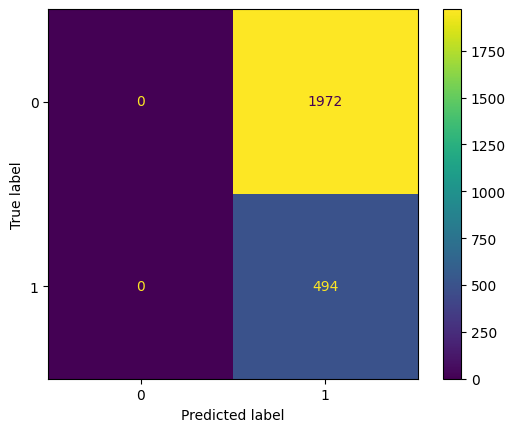

Time: 3.1267147064208984


(0.14334955393349555, 0.2003244120032441, 3.1267147064208984)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import time

class CustomSVMAnalysis:
    def __init__(self, learning_rate=0.01, epochs=100, lambda_param=0.01):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param
        self.scaler = StandardScaler()

    def hing_loss(self, y, y_pred):
        return np.maximum(0, 1 - y * y_pred)

    def svm_cost_function(self, y, y_pred, weights):
        m = len(y)
        regularization = self.lambda_param * np.sum(weights**2)
        loss = np.mean(self.hing_loss(y, y_pred))
        cost = loss + regularization
        return cost

    def svm_gradient_descent(self, X, y):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

        # Initialize weights
        weights = np.ones(X.shape[1])
        errors = []
        prev_error = float('inf')
        for epoch in range(self.epochs):
            for i in range(m):
                # Calculate predicted values
                y_pred = np.dot(X[i], weights)

                # Update weights using gradient descent
                if y[i] * y_pred < 1:
                    gradient = self.lambda_param * weights - y[i] * X[i]
                else:
                    gradient = self.lambda_param * weights

                weights -= self.learning_rate * gradient

            # Calculate cost for monitoring
            y_pred_all = np.dot(X, weights)
            error = self.svm_cost_function(y, y_pred_all, weights)

            # Check for lack of learning in model
            if abs(prev_error - error) < 0.00005:
                print("Model stopped learning")
                break
            prev_error = error

            print(f"Epoch {epoch}/{self.epochs}, Training Cost: {error}")

        return weights

    def run_analysis(self, X_train, y_train, X_test, y_test):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print('Beginning analysis')
        start_time = time.time()

        # Train the model using gradient descent
        weights = self.svm_gradient_descent(X_train_scaled, y_train)

        # Make predictions
        y_pred_train = np.sign(np.dot(np.concatenate((np.ones((len(X_train_scaled), 1)), X_train_scaled), axis=1), weights))
        y_pred_test = np.sign(np.dot(np.concatenate((np.ones((len(X_test_scaled), 1)), X_test_scaled), axis=1), weights))

        # Evaluation
        accuracy_train = np.mean(y_pred_train == y_train)
        accuracy_test = np.mean(y_pred_test == y_test)

        print(f"Training Accuracy: {accuracy_train}")
        print(f"Testing Accuracy: {accuracy_test}")

        confusion = confusion_matrix(y_test, y_pred_test)
        class_report = classification_report(y_test, y_pred_test)

        print('Confusion Matrix')
        print(confusion)
        print('Classification Report')
        print(class_report)

        disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
        disp.plot()
        plt.show()

        elapsed_time = time.time() - start_time

        print(f"Time: {elapsed_time}")

        return accuracy_train, accuracy_test, elapsed_time

# Assuming X_train, y_train, X_test, y_test are already defined

# Create an instance of the class
svm_analysis = CustomSVMAnalysis()

# Run the analysis
svm_analysis.run_analysis(X_train, y_train, X_test, y_test)


Soft Margin SVM with Support Vector Classification

Beginning analysis for C: 0.001
Training Accuracy: 0.8882806163828062
Testing Accuracy: 0.8329278183292782
Confusion Matrix
[[1932   40]
 [ 372  122]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      1972
           1       0.75      0.25      0.37       494

    accuracy                           0.83      2466
   macro avg       0.80      0.61      0.64      2466
weighted avg       0.82      0.83      0.80      2466



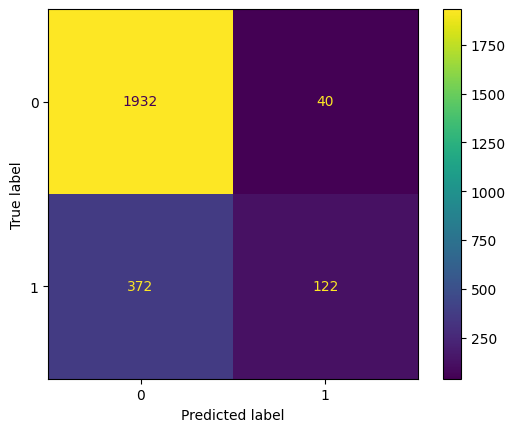

Time: 1.3158555030822754
Beginning analysis for C: 0.01
Training Accuracy: 0.8968978102189781
Testing Accuracy: 0.8394160583941606
Confusion Matrix
[[1912   60]
 [ 336  158]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.32      0.44       494

    accuracy                           0.84      2466
   macro avg       0.79      0.64      0.67      2466
weighted avg       0.83      0.84      0.81      2466



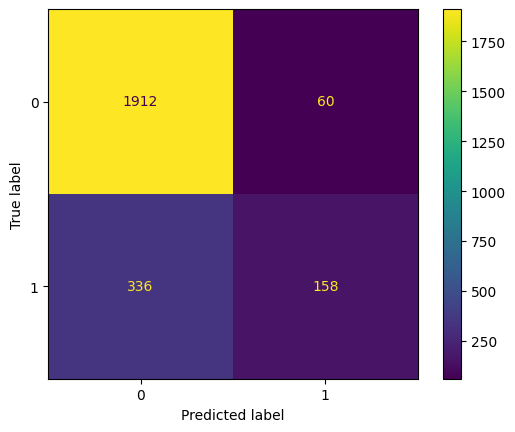

Time: 1.427839994430542
Beginning analysis for C: 0.1
Training Accuracy: 0.8980129764801298
Testing Accuracy: 0.8402270884022709
Confusion Matrix
[[1910   62]
 [ 332  162]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



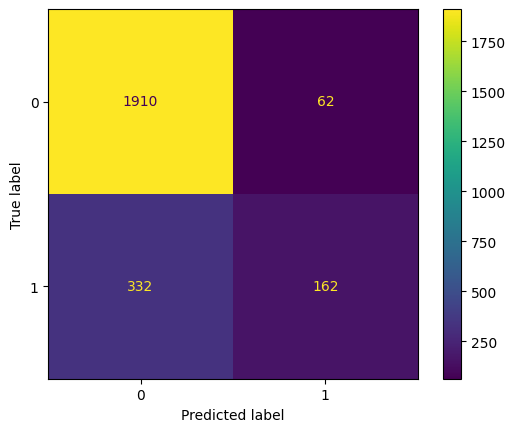

Time: 1.6889548301696777
Beginning analysis for C: 1.0
Training Accuracy: 0.8981143552311436
Testing Accuracy: 0.8402270884022709
Confusion Matrix
[[1910   62]
 [ 332  162]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



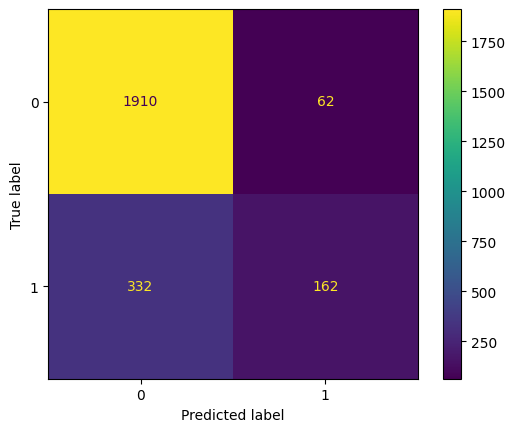

Time: 4.838892936706543
Beginning analysis for C: 10.0
Training Accuracy: 0.8983171127331712
Testing Accuracy: 0.8402270884022709
Confusion Matrix
[[1910   62]
 [ 332  162]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1972
           1       0.72      0.33      0.45       494

    accuracy                           0.84      2466
   macro avg       0.79      0.65      0.68      2466
weighted avg       0.83      0.84      0.82      2466



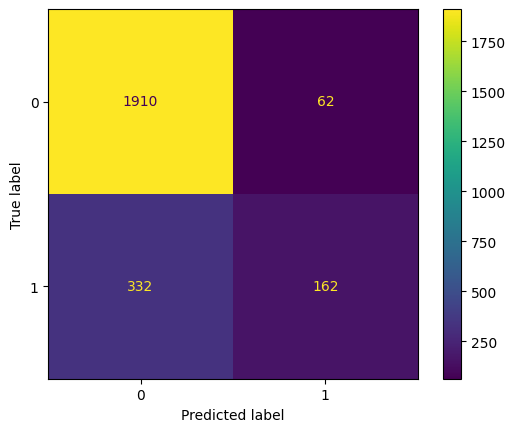

Time: 19.852904558181763
Beginning analysis for C: None
Epoch 0/100, Training Cost: 0.8815357527210337
Epoch 1/100, Training Cost: 0.8682371567359148
Epoch 2/100, Training Cost: 0.868729210389165
Epoch 3/100, Training Cost: 0.8685458579311519
Epoch 4/100, Training Cost: 0.8690727003733664
Epoch 5/100, Training Cost: 0.8689104289840625
Epoch 6/100, Training Cost: 0.8686849963353103
Epoch 7/100, Training Cost: 0.8689372953779053
Epoch 8/100, Training Cost: 0.8685773348066367
Epoch 9/100, Training Cost: 0.8687703678809838
Epoch 10/100, Training Cost: 0.8687084471434229
Epoch 11/100, Training Cost: 0.8688636044323444
Epoch 12/100, Training Cost: 0.8693459342041162
Epoch 13/100, Training Cost: 0.8688164499693573
Epoch 14/100, Training Cost: 0.8687395560958808
Epoch 15/100, Training Cost: 0.8685774673894004
Epoch 16/100, Training Cost: 0.8686450995229033
Epoch 17/100, Training Cost: 0.8691409979928252
Epoch 18/100, Training Cost: 0.8683498017844073
Epoch 19/100, Training Cost: 0.868819445410

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


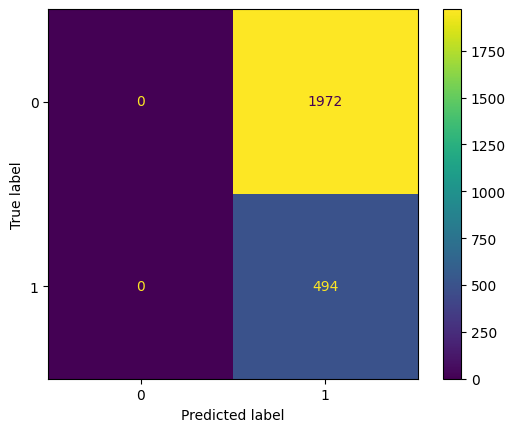

Time: 4.497121334075928


(0.14334955393349555, 0.2003244120032441, 4.497121334075928)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import time

class CustomSVMAnalysis:
    def __init__(self, C_values=[0.001, 0.01, 0.1, 1.0, 10.0], gradient_descent=False, learning_rate=0.01, epochs=100, lambda_param=0.01):
        self.C_values = C_values
        self.scaler = StandardScaler()
        self.gradient_descent = gradient_descent
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param

    def hing_loss(self, y, y_pred):
        return np.maximum(0, 1 - y * y_pred)

    def svm_cost_function(self, y, y_pred, weights):
        m = len(y)
        regularization = self.lambda_param * np.sum(weights**2)
        loss = np.mean(self.hing_loss(y, y_pred))
        cost = loss + regularization
        return cost

    def svm_gradient_descent(self, X, y):
        m, n = X.shape
        X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

        # Initialize weights
        weights = np.ones(X.shape[1])
        errors = []
        prev_error = float('inf')
        for epoch in range(self.epochs):
            for i in range(m):
                # Calculate predicted values
                y_pred = np.dot(X[i], weights)

                # Update weights using gradient descent
                if y[i] * y_pred < 1:
                    gradient = self.lambda_param * weights - y[i] * X[i]
                else:
                    gradient = self.lambda_param * weights

                weights -= self.learning_rate * gradient

            # Calculate cost for monitoring
            y_pred_all = np.dot(X, weights)
            error = self.svm_cost_function(y, y_pred_all, weights)

            # Check for lack of learning in model
            if abs(prev_error - error) < 0.00005:
                print("Model stopped learning")
                break
            prev_error = error

            print(f"Epoch {epoch}/{self.epochs}, Training Cost: {error}")

        return weights

    def run_analysis(self, X_train, y_train, X_test, y_test, C_value):
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        print(f'Beginning analysis for C: {C_value}')
        start_time = time.time()

        if self.gradient_descent:
            # Train the model using gradient descent
            weights = self.svm_gradient_descent(X_train_scaled, y_train)
            y_pred_train = np.sign(np.dot(np.concatenate((np.ones((len(X_train_scaled), 1)), X_train_scaled), axis=1), weights))
            y_pred_test = np.sign(np.dot(np.concatenate((np.ones((len(X_test_scaled), 1)), X_test_scaled), axis=1), weights))
        else:
            # Create an instance of SVC with the specified C value
            svc_model = SVC(C=C_value, kernel='linear')

            # Train the model
            svc_model.fit(X_train_scaled, y_train)

            # Training set predictions
            y_pred_train = svc_model.predict(X_train_scaled)
            # Testing set predictions
            y_pred_test = svc_model.predict(X_test_scaled)

        # Evaluation
        accuracy_train = np.mean(y_pred_train == y_train)
        accuracy_test = np.mean(y_pred_test == y_test)

        print(f"Training Accuracy: {accuracy_train}")
        print(f"Testing Accuracy: {accuracy_test}")

        confusion = confusion_matrix(y_test, y_pred_test)
        class_report = classification_report(y_test, y_pred_test)

        print('Confusion Matrix')
        print(confusion)
        print('Classification Report')
        print(class_report)

        disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
        disp.plot()
        plt.show()

        elapsed_time = time.time() - start_time

        print(f"Time: {elapsed_time}")

        return accuracy_train, accuracy_test, elapsed_time

# Assuming X_train, y_train, X_test, y_test are already defined

# Create an instance of the class for SVC
svm_analysis_svc = CustomSVMAnalysis()

# Run the analysis for each C value using SVC
for C_value in svm_analysis_svc.C_values:
    svm_analysis_svc.run_analysis(X_train, y_train, X_test, y_test, C_value)

# Create an instance of the class for gradient descent
svm_analysis_gd = CustomSVMAnalysis(gradient_descent=True)

# Run the analysis using gradient descent
svm_analysis_gd.run_analysis(X_train, y_train, X_test, y_test, None)  # None for C_value in gradient descent


Soft Margin SVM with Gradient Descent


Training SVM with Lambda = 0.001
Epoch 0/100, Training Cost: 0.8681438849790171
Epoch 1/100, Training Cost: 0.8660860987833373
Epoch 2/100, Training Cost: 0.864396738787976
Epoch 3/100, Training Cost: 0.8630098419374097
Epoch 4/100, Training Cost: 0.8618712552066998
Epoch 5/100, Training Cost: 0.8609365211326989
Epoch 6/100, Training Cost: 0.8601691419199151
Epoch 7/100, Training Cost: 0.8595391543409965
Epoch 8/100, Training Cost: 0.8590219597871432
Epoch 9/100, Training Cost: 0.8585973637863864
Epoch 10/100, Training Cost: 0.8582487874865867
Epoch 11/100, Training Cost: 0.8579626203145798
Epoch 12/100, Training Cost: 0.8577276885352777
Epoch 13/100, Training Cost: 0.8575348189599908
Epoch 14/100, Training Cost: 0.857376480768445
Epoch 15/100, Training Cost: 0.8572464914590129
Epoch 16/100, Training Cost: 0.8571397754456388
Epoch 17/100, Training Cost: 0.8570521658755886
Epoch 18/100, Training Cost: 0.8569802419297655
Epoch 19/100, Training Cost: 0.8569211952527894
Model stopped lear

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


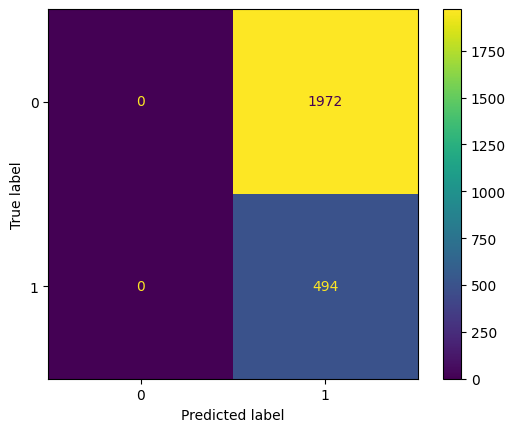


Training SVM with Lambda = 0.01
Epoch 0/100, Training Cost: 0.8761178948196202
Epoch 1/100, Training Cost: 0.8593574572161843
Epoch 2/100, Training Cost: 0.8570268646438651
Epoch 3/100, Training Cost: 0.8568806347228152
Epoch 4/100, Training Cost: 0.8570101307999907
Epoch 5/100, Training Cost: 0.8573630679803118
Epoch 6/100, Training Cost: 0.8569899930744913
Epoch 7/100, Training Cost: 0.856840412362297
Epoch 8/100, Training Cost: 0.8591881753138945
Epoch 9/100, Training Cost: 0.857349270019485
Epoch 10/100, Training Cost: 0.856993522005761
Epoch 11/100, Training Cost: 0.8568401729965166
Epoch 12/100, Training Cost: 0.8570861585801466
Epoch 13/100, Training Cost: 0.8586374091736555
Epoch 14/100, Training Cost: 0.8570848829329654
Model stopped learning
Training Accuracy: 0.14334955393349555
Testing Accuracy: 0.2003244120032441
Confusion Matrix
[[   0 1972]
 [   0  494]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


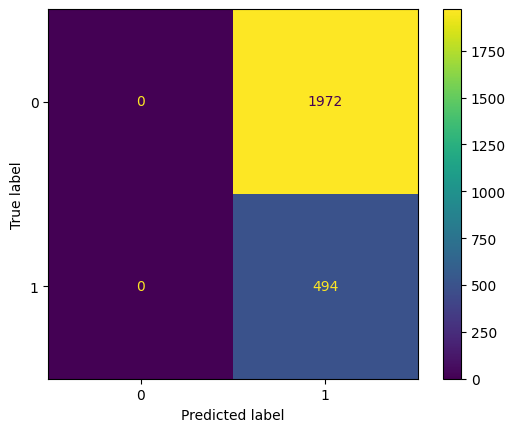


Training SVM with Lambda = 0.1
Epoch 0/100, Training Cost: 0.859211689010642
Epoch 1/100, Training Cost: 0.8596437604947043
Epoch 2/100, Training Cost: 0.8594984410853448
Model stopped learning
Training Accuracy: 0.14334955393349555
Testing Accuracy: 0.2003244120032441
Confusion Matrix
[[   0 1972]
 [   0  494]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


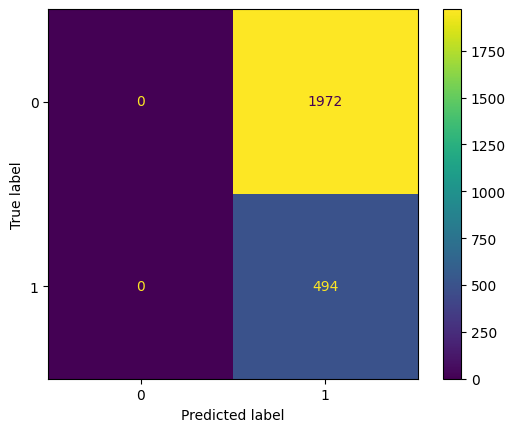


Training SVM with Lambda = 1.0
Epoch 0/100, Training Cost: 0.8598368638130224
Model stopped learning
Training Accuracy: 0.14334955393349555
Testing Accuracy: 0.2003244120032441
Confusion Matrix
[[   0 1972]
 [   0  494]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


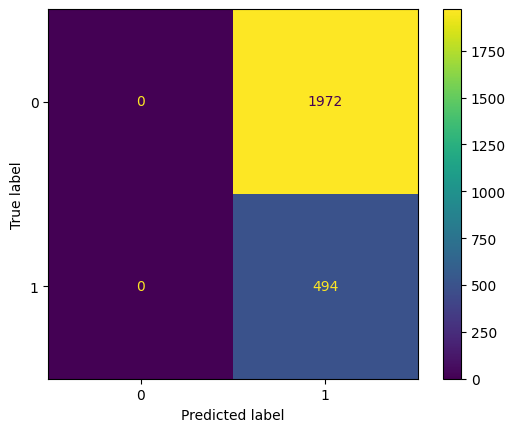


Training SVM with Lambda = 10.0
Epoch 0/100, Training Cost: 124.69604896659335
Model stopped learning
Training Accuracy: 0.14334955393349555
Testing Accuracy: 0.2003244120032441
Confusion Matrix
[[   0 1972]
 [   0  494]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


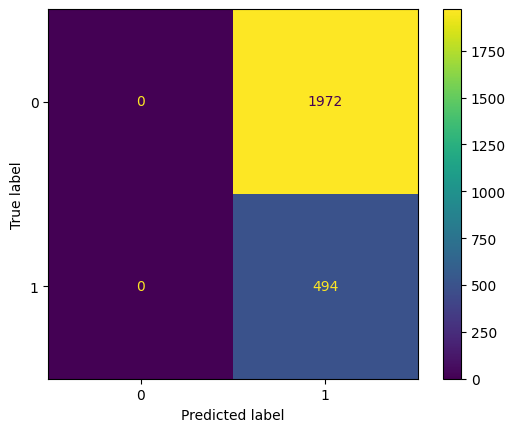

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler



# Parameters
learning_rate = 0.01
epochs = 100
lambda_values = [0.001, 0.01, 0.1, 1.0, 10.0]
epsilon = 0.00005

# Define the hinge loss function for soft margin SVM
def hinge_loss(y, y_pred):
    return np.maximum(0, 1 - y * y_pred)

# Define the cost function for SVM
def svm_cost_function(y, y_pred, lambda_param, weights):
    m = len(y)
    regularization = lambda_param * np.sum(weights**2)
    loss = np.mean(hinge_loss(y, y_pred))
    cost = loss + regularization
    return cost

# Implement gradient descent for SVM
def svm_gradient_descent(X, y, learning_rate, epochs, lambda_param):
    m, n = X.shape
    X = np.concatenate((np.ones((m, 1)), X), axis=1)

    # Initialize weights
    weights = np.ones(X.shape[1])
    errors = []
    prev_error = float('inf')

    for epoch in range(epochs):
        for i in range(m):
            # Calculate predicted values
            y_pred = np.dot(X[i], weights)

            # Update weights using gradient descent
            if y[i] * y_pred < 1:
                gradient = lambda_param * weights - y[i] * X[i]
            else:
                gradient = lambda_param * weights

            weights -= learning_rate * gradient

        # Calculate cost for monitoring
        y_pred_all = np.dot(X, weights)
        error = svm_cost_function(y, y_pred_all, lambda_param, weights)

        # Check for lack of learning in the model
        if abs(prev_error - error) < epsilon:
            print("Model stopped learning")
            break
        prev_error = error

        print(f"Epoch {epoch}/{epochs}, Training Cost: {error}")

    return weights

# Perform bias-variance analysis and evaluation for different lambda values
for lambda_param in lambda_values:
    print(f"\nTraining SVM with Lambda = {lambda_param}")

    # Train the model
    weights = svm_gradient_descent(X_train, y_train, learning_rate, epochs, lambda_param)

    # Make predictions
    y_pred_train = np.sign(np.dot(np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1), weights))
    y_pred_test = np.sign(np.dot(np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1), weights))

    # Evaluation
    accuracy_train = np.mean(y_pred_train == y_train)
    accuracy_test = np.mean(y_pred_test == y_test)

    print(f"Training Accuracy: {accuracy_train}")
    print(f"Testing Accuracy: {accuracy_test}")

    confusion = confusion_matrix(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)

    print('Confusion Matrix')
    print(confusion)
    print('Classification Report')
    print(class_report)

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot()
    plt.show()


In [ ]:
pip install imbalanced-learn


Soft Margin SVM using Gradient Descent and SMOTE

Epoch 0/1000, Training Cost: 1.7308053725945285
Epoch 1/1000, Training Cost: 1.3214665095585059
Epoch 2/1000, Training Cost: 1.0670868383923873
Epoch 3/1000, Training Cost: 0.9033464925367662
Epoch 4/1000, Training Cost: 0.7951633642664595
Epoch 5/1000, Training Cost: 0.7230132744816519
Epoch 6/1000, Training Cost: 0.6748588813800782
Epoch 7/1000, Training Cost: 0.64287039897168
Epoch 8/1000, Training Cost: 0.6230203630376858
Epoch 9/1000, Training Cost: 0.6114088059526468
Epoch 10/1000, Training Cost: 0.6044626139811471
Epoch 11/1000, Training Cost: 0.6003579311657181
Epoch 12/1000, Training Cost: 0.5981244376817118
Epoch 13/1000, Training Cost: 0.5968600256302646
Epoch 14/1000, Training Cost: 0.5964860400752046
Epoch 15/1000, Training Cost: 0.5962031147393478
Model stopped learning
Testing Accuracy with Resampling: 0.2003244120032441
Confusion Matrix with Resampling
[[   0 1972]
 [   0  494]]
Classification Report with Resampling
              precision    recall  f1-score   support


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


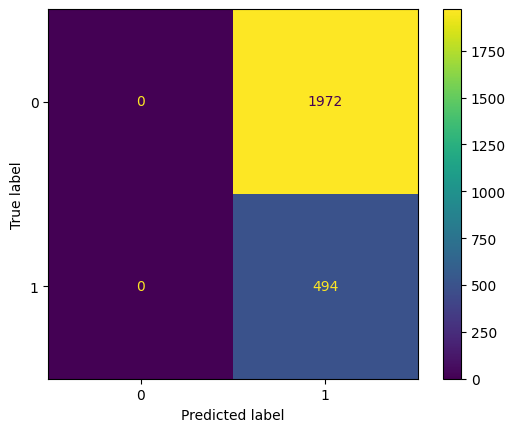

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.0001
epochs = 1000
lambda_param = 0.1
epsilon = 0.00005

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Class Imbalance Handling: SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# SVM gradient descent
def svm_gradient_descent(X, y, learning_rate, epochs, lambda_param):
    m, n = X.shape
    X = np.concatenate((np.ones((m, 1)), X), axis=1)  # Add a bias term

    # Initialize weights
    weights = np.ones(X.shape[1])

    # Training
    prev_error = float('inf')
    for epoch in range(epochs):
        for i in range(m):
            # Calculate predicted values
            y_pred = np.dot(X[i], weights)

            # Update weights using gradient descent
            if y[i] * y_pred < 1:
                gradient = lambda_param * weights - y[i] * X[i]
            else:
                gradient = lambda_param * weights

            weights -= learning_rate * gradient

        # Calculate cost for monitoring
        y_pred_all = np.dot(X, weights)
        error = svm_cost_function(y, y_pred_all, lambda_param, weights)

        # Check for lack of learning in the model
        if abs(prev_error - error) < epsilon:
            print("Model stopped learning")
            break
        prev_error = error

        print(f"Epoch {epoch}/{epochs}, Training Cost: {error}")

    return weights

# Train the model on the resampled data
weights_resampled = svm_gradient_descent(X_train_resampled, y_train_resampled, learning_rate, epochs, lambda_param)

# Make predictions on the test set
y_pred_test_resampled = svm_predict(X_test_scaled, weights_resampled)

# Evaluation
accuracy_test_resampled = np.mean(y_pred_test_resampled == y_test)

print(f"Testing Accuracy with Resampling: {accuracy_test_resampled}")

confusion_resampled = confusion_matrix(y_test, y_pred_test_resampled)
class_report_resampled = classification_report(y_test, y_pred_test_resampled)

print('Confusion Matrix with Resampling')
print(confusion_resampled)
print('Classification Report with Resampling')
print(class_report_resampled)

disp_resampled = ConfusionMatrixDisplay(confusion_matrix=confusion_resampled)
disp_resampled.plot()
plt.show()


###SVM Implementation with Sequential least squares programing (SLSQP)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8566826938772917
            Iterations: 7
            Function evaluations: 17
            Gradient evaluations: 7
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


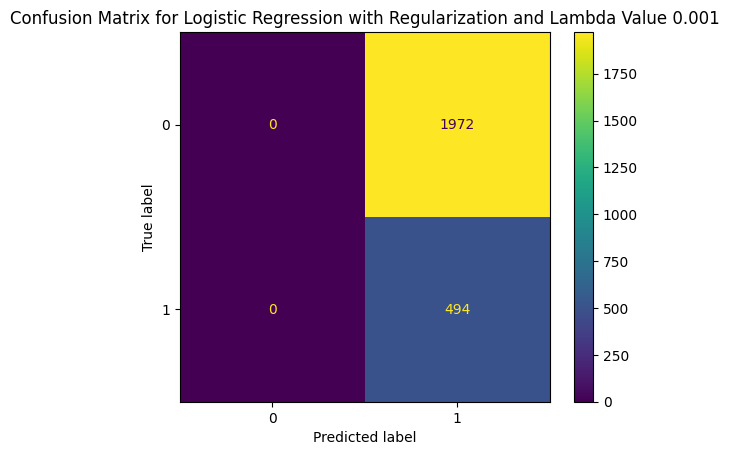

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8569477625952401
            Iterations: 8
            Function evaluations: 22
            Gradient evaluations: 8
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


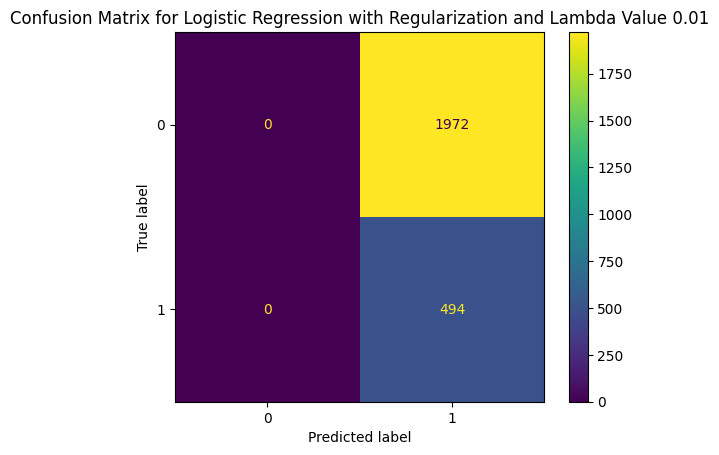

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8589801003401574
            Iterations: 9
            Function evaluations: 25
            Gradient evaluations: 9
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


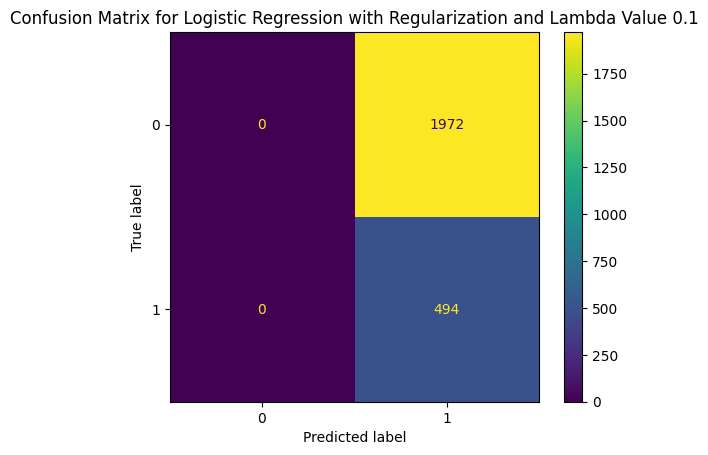

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8578096691707043
            Iterations: 21
            Function evaluations: 37
            Gradient evaluations: 21
Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.00      0.00      0.00      1972
         1.0       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.07      0.33      0.11      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

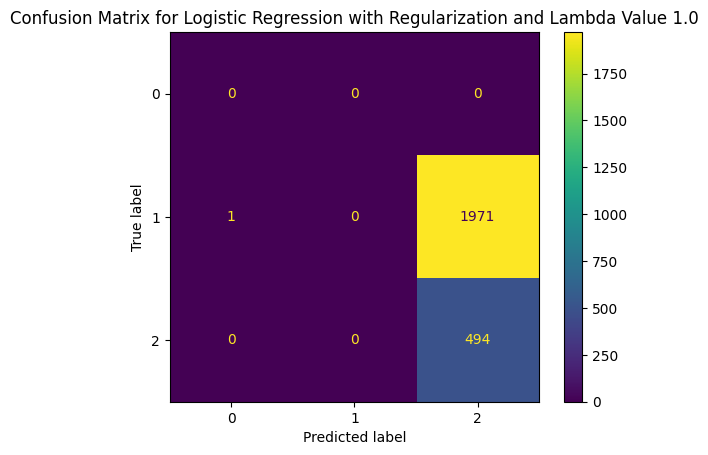

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.8596227815225331
            Iterations: 17
            Function evaluations: 37
            Gradient evaluations: 17
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1972
           1       0.20      1.00      0.33       494

    accuracy                           0.20      2466
   macro avg       0.10      0.50      0.17      2466
weighted avg       0.04      0.20      0.07      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


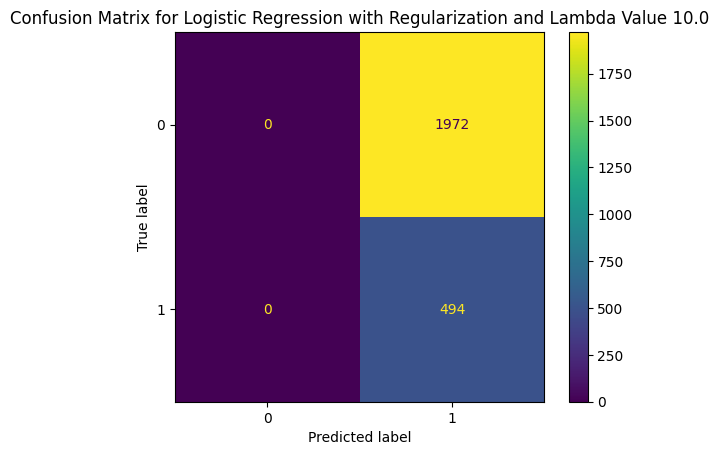

Lambda	Training Cost	Testing Cost	Bias Squared	Variance	Time (s)
0.001	0.8566826938772917	0.7997078358075431	0.0	0.0	0.6514058113098145
0.01	0.8569477625952401	0.8000285199397832	0.0	0.0	0.7361745834350586
0.1	0.8589801003401574	0.8021149984518787	0.0	0.0	0.7804465293884277
1.0	0.8578096691707043	0.8007277766961455	0.0016214022465465441	0.0016214022465465441	1.549250602722168
10.0	0.8596227815225331	0.8027045417097809	0.0	0.0	1.2864570617675781


In [ ]:
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
import time

learning_rate = 0.1
epochs = 100
lambda_reg_values = [0.001, 0.01, 0.1, 1.0, 10.0]

def hinge_loss(y, y_pred):
    return np.maximum(0, 1 - y * y_pred)

def svm_cost_function(weights, X, y, lambda_reg):
    y_pred = np.dot(X, weights)
    m = len(y)
    loss = np.mean(hinge_loss(y, y_pred))
    regularization = (lambda_reg / 2) * np.sum(weights[1:] ** 2)
    return loss + regularization

def svm_gradient(weights, X, y, lambda_reg):
    m, n = X.shape
    y_pred = np.dot(X, weights)
    gradient = np.zeros_like(weights)

    for i in range(m):
        if y[i] * y_pred[i] < 1:
            gradient += lambda_reg * weights - y[i] * X[i]
        else:
            gradient += lambda_reg * weights
    gradient /= m
    return gradient

def svm_slsqp_optimization(X, y, lambda_reg):
    m, n = X.shape
    X_with_bias = np.concatenate((np.ones((m, 1)), X), axis=1)
    initial_weights = np.zeros(n + 1)

    bounds = [(0, lambda_reg) for _ in range(m)]

    result = minimize(svm_cost_function, initial_weights, args=(X_with_bias, y, lambda_reg),
                      jac=svm_gradient, method='SLSQP', options={'disp': True})

    return result.x

def svm_predict(X, weights):
    X_with_bias = np.concatenate((np.ones((len(X), 1)), X), axis=1)
    y_pred = np.dot(X_with_bias, weights)
    return np.sign(y_pred)

def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Perform bias-variance analysis and cost analysis of time
training_costs, testing_costs, bias_squared, variance, times = [], [], [], [], []

for lambda_reg in lambda_reg_values:
    start_time = time.time()

    weights = svm_slsqp_optimization(X_train, y_train, lambda_reg)

    y_pred_train = svm_predict(X_train, weights)
    accuracy_train = calculate_accuracy(y_train, y_pred_train)
    training_costs.append(svm_cost_function(weights, np.concatenate((np.ones((len(X_train), 1)), X_train), axis=1), y_train, lambda_reg))

    y_pred_test = svm_predict(X_test, weights)
    accuracy_test = calculate_accuracy(y_test, y_pred_test)
    testing_costs.append(svm_cost_function(weights, np.concatenate((np.ones((len(X_test), 1)), X_test), axis=1), y_test, lambda_reg))

    confusion = confusion_matrix(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)

    print('Classification Report')
    print(class_report)

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot()
    plt.title("Confusion Matrix for Logistic Regression with Regularization and Lambda Value " + str(lambda_reg))
    plt.show()

    bias_squared.append(np.mean((y_pred_test - np.mean(y_pred_test))**2))
    variance.append(np.var(y_pred_test))

    times.append(time.time() - start_time)

# Print results
print("Lambda\tTraining Cost\tTesting Cost\tBias Squared\tVariance\tTime (s)")
for i in range(len(lambda_reg_values)):
    print(f"{lambda_reg_values[i]}\t{training_costs[i]}\t{testing_costs[i]}\t{bias_squared[i]}\t{variance[i]}\t{times[i]}")



### Naive Bayes

In [ ]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initialize mean, variance, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + class_conditional
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
nb = NaiveBayes()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

Accuracy: 0.8114355231143552
Precision: 0.5283757338551859
Recall: 0.5465587044534413
Confusion Matrix: 
[[1731  241]
 [ 224  270]]


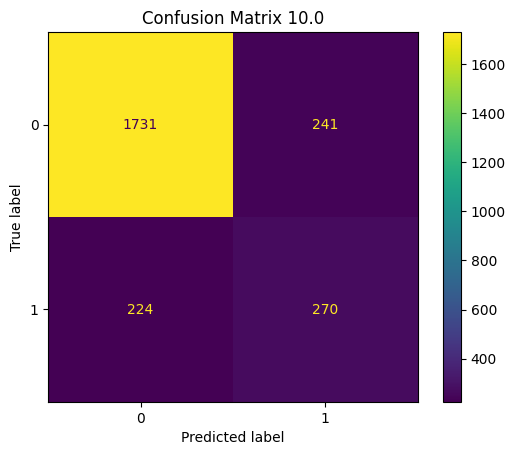

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1972
           1       0.53      0.55      0.54       494

    accuracy                           0.81      2466
   macro avg       0.71      0.71      0.71      2466
weighted avg       0.81      0.81      0.81      2466



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming predictions and y_test are already defined
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix: \n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix " + str(lambda_reg))
plt.show()

class_report = classification_report(y_test, predictions)

print('Classification Report')
print(class_report)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming nb is your NaiveBayes instance
# and X_train, y_train, X_test, y_test are already defined

# Train the model
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predict on the training data
predictions_train = nb.predict(X_train)

# Predict on the test data
predictions_test = nb.predict(X_test)

# Calculate the training accuracy
train_accuracy = accuracy_score(y_train, predictions_train)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, predictions_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

<ipython-input-112-06e526d188f8>:27: RuntimeWarning: divide by zero encountered in log
  class_conditional = np.sum(np.log(self._pdf(idx, x)))


Training Accuracy: 85.83%
Test Accuracy: 81.14%


# Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model (simplified)
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1, callbacks=[early_stopping])

# Evaluate the model on train set
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Train Loss: {loss}, Train Accuracy: {accuracy}')

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/100
124/124 [==============================] - 2s 6ms/step - loss: 10.8210 - accuracy: 0.7597 - val_loss: 7.0145 - val_accuracy: 0.8018
Epoch 2/100
124/124 [==============================] - 1s 5ms/step - loss: 5.4414 - accuracy: 0.7851 - val_loss: 3.4807 - val_accuracy: 0.8130
Epoch 3/100
124/124 [==============================] - 1s 5ms/step - loss: 3.8566 - accuracy: 0.8131 - val_loss: 1.9464 - val_accuracy: 0.8044
Epoch 4/100
124/124 [==============================] - 0s 3ms/step - loss: 3.3397 - accuracy: 0.8142 - val_loss: 4.4986 - val_accuracy: 0.8084
Epoch 5/100
124/124 [==============================] - 0s 3ms/step - loss: 2.7292 - accuracy: 0.8311 - val_loss: 3.5513 - val_accuracy: 0.8155
Epoch 6/100
124/124 [==============================] - 0s 3ms/step - loss: 2.1484 - accuracy: 0.8358 - val_loss: 0.8171 - val_accuracy: 0.8327
Epoch 7/100
124/124 [==============================] - 0s 3ms/step - loss: 1.9199 - accuracy: 0.8374 - val_loss: 2.0323 - val_accuracy: 0.820

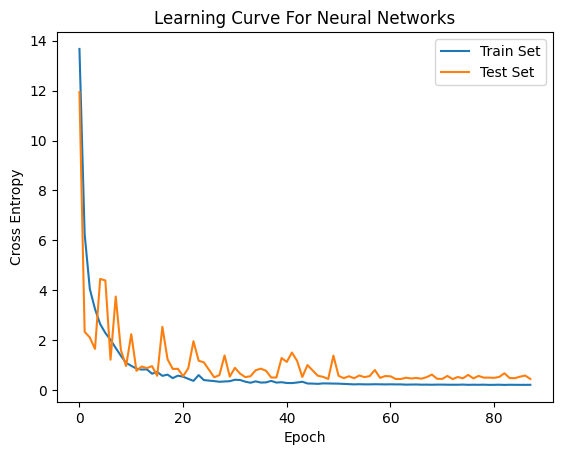

In [ ]:
plt.title('Learning Curve For Neural Networks')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='Train Set')
plt.plot(history.history['val_loss'], label='Test Set')
plt.legend()
plt.show()